# Przygotowanie

• Get the data (2 cities)  
• Upload it to your tool of choice  
• Run linear regression model  
• Run LASSO  
• Run XGBoost + XAI

In [386]:
!pip install gdown -qq

In [387]:
!pip install shap

In [388]:
import gdown
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import preprocessing
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import lasso_path
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
import xgboost
import shap

In [389]:
# download data
url = 'https://drive.google.com/uc?id=1BtfKFKqilN8KHVg_yx8v9btYu3l-XbJP'
output = "listings_london.csv"
gdown.download(url, output)

Downloading...
From: https://drive.google.com/uc?id=1BtfKFKqilN8KHVg_yx8v9btYu3l-XbJP
To: /content/listings_london.csv
100%|██████████| 117M/117M [00:01<00:00, 117MB/s]


'listings_london.csv'

In [390]:
url = 'https://drive.google.com/uc?id=1ohuAfNGmJsl8GVehvtr17bOBr8SmvjHP'
output = "listings_toronto.csv"
gdown.download(url, output)

Downloading...
From: https://drive.google.com/uc?id=1ohuAfNGmJsl8GVehvtr17bOBr8SmvjHP
To: /content/listings_toronto.csv
100%|██████████| 24.4M/24.4M [00:00<00:00, 147MB/s]


'listings_toronto.csv'

In [391]:
!ls -lah

total 136M
drwxr-xr-x 1 root root 4.0K Jan 10 10:48 .
drwxr-xr-x 1 root root 4.0K Jan 10 09:09 ..
drwxr-xr-x 4 root root 4.0K Jan  8 14:20 .config
-rw-r--r-- 1 root root 112M Jan 10 10:47 listings_london.csv
-rw-r--r-- 1 root root  24M Jan 10 10:48 listings_toronto.csv
drwxr-xr-x 1 root root 4.0K Jan  8 14:21 sample_data


In [392]:
pd.set_option('display.max_columns', None)

In [393]:
dataL = pd.read_csv('listings_london.csv')
dataL.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,198258,https://www.airbnb.com/rooms/198258,20231210055232,2023-12-10,city scrape,Rental unit in Barking · ★4.74 · 1 bedroom · 1...,NaN,"I live in Barking town centre, at one time the...",https://a0.muscache.com/pictures/airflow/Hosti...,967537,https://www.airbnb.com/users/show/967537,Ryan,2011-08-14,"Barking, United Kingdom","Do the Math\r\n\r\nHi all, im just a crazy kid...",within an hour,100%,75%,f,https://a0.muscache.com/im/pictures/user/360a7...,https://a0.muscache.com/im/pictures/user/360a7...,NaN,1.00,1.00,"['email', 'phone']",t,t,"Barking, London, United Kingdom",Barking and Dagenham,NaN,51.53,0.08,Private room in rental unit,Private room,1,NaN,1 shared bath,NaN,1.00,[],$67.00,2,100,2.00,2.00,100.00,100.00,2.00,100.00,NaN,t,28,58,88,363,2023-12-10,41,1,0,2011-08-22,2023-03-16,4.74,4.83,4.25,4.80,4.88,4.45,4.68,NaN,f,1,0,1,0,0.27
1,33332,https://www.airbnb.com/rooms/33332,20231210055232,2023-12-10,city scrape,"Home in St Margaret's, Isleworth · ★4.40 · 1 ...",NaN,Peaceful and friendly.,https://a0.muscache.com/pictures/miso/Hosting-...,144444,https://www.airbnb.com/users/show/144444,Chi-Chi,2010-06-14,"Isleworth, United Kingdom",Quite busy and often in a different place ever...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/8028d...,https://a0.muscache.com/im/pictures/user/8028d...,LB of Hounslow,2.00,2.00,"['email', 'phone']",t,f,"St Margaret's, Isleworth, Middlesex, United K...",Richmond upon Thames,NaN,51.46,-0.32,Private room in home,Private room,2,NaN,1 private bath,NaN,1.00,[],$140.00,2,21,2.00,2.00,21.00,21.00,2.00,21.00,NaN,t,30,60,90,365,2023-12-10,20,0,0,2010-10-16,2022-08-01,4.40,4.47,4.58,4.58,4.53,4.68,4.26,NaN,f,2,0,2,0,0.12
2,42010,https://www.airbnb.com/rooms/42010,20231210055232,2023-12-10,city scrape,Home in East Finchley · ★4.88 · 1 bedroom · 1 ...,NaN,We have a unique cinema called the Phoenix whi...,https://a0.muscache.com/pictures/airflow/Hosti...,157884,https://www.airbnb.com/users/show/157884,Agri & Roger,2010-07-04,"London, United Kingdom",We are a happy couple who live in a wonderful ...,within a few hours,100%,100%,t,https://a0.muscache.com/im/users/157884/profil...,https://a0.muscache.com/im/users/157884/profil...,LB of Haringey,2.00,4.00,"['email', 'phone']",t,t,"East Finchley, United Kingdom",Barnet,NaN,51.59,-0.16,Private room in home,Private room,2,NaN,1 shared bath,NaN,1.00,[],$65.00,4,365,4.00,4.00,365.00,365.00,4.00,365.00,NaN,t,9,18,31,208,2023-12-10,556,29,3,2010-09-22,2023-12-03,4.88,4.89,4.83,4.96,4.95,4.73,4.87,NaN,t,2,0,2,0,3.45


In [394]:
dataT = pd.read_csv('listings_toronto.csv')
dataT.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1002736951366032648,https://www.airbnb.com/rooms/1002736951366032648,20231212054246,2023-12-12,city scrape,Bungalow in Toronto · ★New · 1 bedroom · 1 bed...,NaN,NaN,https://a0.muscache.com/pictures/8c0a277f-2ce5...,273730029,https://www.airbnb.com/users/show/273730029,Tran Thien Ly,2019-07-05,"Toronto, Canada","""The most beautiful things in life are not thi...",within an hour,100%,98%,NaN,https://a0.muscache.com/im/pictures/user/fe5d9...,https://a0.muscache.com/im/pictures/user/fe5d9...,Westmount,5.00,6.00,"['email', 'phone']",t,t,NaN,Humber Heights-Westmount,NaN,43.69,-79.52,Private room in bungalow,Private room,2,NaN,1 bath,NaN,1.00,[],$72.00,28,365,28,28,365,365,28.00,365.00,NaN,t,21,51,81,94,2023-12-12,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,3,0,3,0,NaN
1,716133555965651038,https://www.airbnb.com/rooms/716133555965651038,20231212054246,2023-12-12,city scrape,Townhouse in North York · 1 bedroom · 2 beds ·...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,474878080,https://www.airbnb.com/users/show/474878080,Huu-Hoa,2022-08-13,"Toronto, Canada",NaN,within an hour,100%,95%,t,https://a0.muscache.com/im/pictures/user/ca5fb...,https://a0.muscache.com/im/pictures/user/ca5fb...,NaN,4.00,5.00,"['email', 'phone']",t,t,NaN,Downsview-Roding-CFB,NaN,43.74,-79.47,Private room in townhouse,Private room,3,NaN,1 private bath,NaN,2.00,[],$110.00,28,365,28,28,1125,1125,28.00,1125.00,NaN,t,30,60,90,365,2023-12-12,1,0,0,2022-11-24,2022-11-24,5.00,5.00,5.00,5.00,5.00,5.00,5.00,STR-2208-FWRHHD,t,4,0,4,0,0.08
2,27278791,https://www.airbnb.com/rooms/27278791,20231212054246,2023-12-12,city scrape,Home in Toronto · ★4.91 · 1 bedroom · 2 beds ·...,NaN,This house is on a very quiet street of the Ce...,https://a0.muscache.com/pictures/miso/Hosting-...,141166875,https://www.airbnb.com/users/show/141166875,Andrew,2017-07-18,"Toronto, Canada",NaN,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/247f8...,https://a0.muscache.com/im/pictures/user/247f8...,The Westway,3.00,7.00,"['email', 'phone']",t,t,"Toronto, Ontario, Canada",Kingsview Village-The Westway,NaN,43.70,-79.54,Private room in home,Private room,4,NaN,1 private bath,NaN,2.00,[],$104.00,1,89,1,2,1125,1125,1.50,1125.00,NaN,t,18,48,78,334,2023-12-12,503,107,15,2018-10-19,2023-12-11,4.91,4.94,4.92,4.97,4.97,4.90,4.87,STR-2009-GQYXPG,f,3,0,3,0,8.02


# Londyn

## Obróbka danych

In [395]:
dataL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91778 entries, 0 to 91777
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            91778 non-null  int64  
 1   listing_url                                   91778 non-null  object 
 2   scrape_id                                     91778 non-null  int64  
 3   last_scraped                                  91778 non-null  object 
 4   source                                        91778 non-null  object 
 5   name                                          91778 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         48999 non-null  object 
 8   picture_url                                   91767 non-null  object 
 9   host_id                                       91778 non-null 

In [396]:
# Procentowy wynik wartości NaN w kolumnach
dataL1 = dataL.isna().sum() > 0
dataL.loc[:, dataL1].isna().sum().sort_values(ascending=False) / len(dataL) * 100

description                    100.00
neighbourhood_group_cleansed   100.00
license                        100.00
calendar_updated               100.00
bathrooms                      100.00
bedrooms                        99.98
host_about                      48.13
host_neighbourhood              47.14
neighborhood_overview           46.61
neighbourhood                   46.61
host_response_rate              33.42
host_response_time              33.42
host_acceptance_rate            27.99
review_scores_value             26.28
last_review                     26.28
first_review                    26.28
reviews_per_month               26.28
review_scores_location          26.28
review_scores_checkin           26.28
review_scores_communication     26.25
review_scores_accuracy          26.25
review_scores_cleanliness       26.24
review_scores_rating            26.22
host_location                   21.68
has_availability                 4.55
price                            4.55
beds        

In [397]:
# usuwanie niepotrzebnych kolumn z największymi brakami w danych
dataL.drop([
    'description',
    'neighbourhood_group_cleansed', # zamiast tego można użyć neighbourhood_cleansed
    'license',
    'calendar_updated',
    'bedrooms', # nie ma skąd wziąć tej informacji
    'amenities' # puste tabele
    ], axis=1, inplace=True)

In [398]:
# bathrooms_text na bathrooms
dataL['bathrooms_text'].unique()

array(['1 shared bath', '1 private bath', '1.5 baths', '1 bath', nan,
       '3 baths', '1.5 shared baths', '2 baths', '3.5 baths', '2.5 baths',
       'Half-bath', '4 baths', '2.5 shared baths', '2 shared baths',
       '6.5 baths', '4.5 baths', '0 baths', '3 shared baths',
       'Shared half-bath', '5.5 baths', '5 baths', '0 shared baths',
       'Private half-bath', '7 baths', '3.5 shared baths', '6 baths',
       '5.5 shared baths', '4.5 shared baths', '5 shared baths',
       '12 baths', '4 shared baths', '48 baths', '8 baths', '12.5 baths',
       '13 baths', '10.5 baths', '16.5 baths', '10 baths', '7.5 baths',
       '7 shared baths', '9 baths', '8 shared baths', '17 baths',
       '9.5 baths', '8.5 baths', '23 baths', '16 baths',
       '13 shared baths', '6 shared baths', '22 baths', '20 baths'],
      dtype=object)

In [399]:
dataL['bathrooms'] = dataL['bathrooms_text'].str.extract('([\d.]+)').astype(float)
dataL['bathrooms'] = np.where(dataL['bathrooms_text'] == 'Half-bath', 0.5, dataL['bathrooms'])

In [400]:
# zakładamy że jak nie ma wprowadzonej to jest 1
dataL['bathrooms'].mode()

0   1.00
Name: bathrooms, dtype: float64

In [401]:
dataL['bathrooms'].fillna(1, inplace=True)
dataL['bathrooms'].unique()

array([ 1. ,  1.5,  3. ,  2. ,  3.5,  2.5,  0.5,  4. ,  6.5,  4.5,  0. ,
        5.5,  5. ,  7. ,  6. , 12. , 48. ,  8. , 12.5, 13. , 10.5, 16.5,
       10. ,  7.5,  9. , 17. ,  9.5,  8.5, 23. , 16. , 22. , 20. ])

In [402]:
# zamiana t/f na 1/0 zakładając, że jeśli NaN to f

dataL[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']].head(3)

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable
0,f,t,t,t,f
1,f,t,f,t,f
2,t,t,t,t,t


In [403]:
mapping_func = {'t' : 1, 'f' : 0}
kolumnytf = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']
dataL[kolumnytf] = dataL[kolumnytf].applymap(lambda x: mapping_func.get(x, 0)).astype(bool)

In [404]:
# wartości procentowe na ułamki
dataL[['host_response_rate', 'host_acceptance_rate']].head(3)

,host_response_rate,host_acceptance_rate
0,100%,75%
1,NaN,NaN
2,100%,100%


In [405]:
kolumnypr = ['host_response_rate', 'host_acceptance_rate']
dataL[kolumnypr] = dataL[kolumnypr].apply(lambda x: x.str.replace('%','').astype(float) / 100)

In [406]:
dataL[kolumnypr].isna().sum() / len(dataL[kolumnypr]) * 100

host_response_rate     33.42
host_acceptance_rate   27.99
dtype: float64

In [407]:
# Dane zostaną zamienione wartościami średnimi
dataL[kolumnypr].describe()

,host_response_rate,host_acceptance_rate
count,61105.00,66085.00
mean,0.92,0.84
std,0.22,0.26
min,0.00,0.00
25%,0.97,0.78
50%,1.00,0.96
75%,1.00,1.00
max,1.00,1.00


In [408]:
dataL['host_response_rate'].fillna(round(dataL['host_response_rate'].mean(), 2), inplace=True)
dataL['host_acceptance_rate'].fillna(round(dataL['host_acceptance_rate'].mean(), 2), inplace=True)

In [409]:
# daty
kolumnydat = ['last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 'last_review']
dataL[kolumnydat].head(3)

,last_scraped,host_since,calendar_last_scraped,first_review,last_review
0,2023-12-10,2011-08-14,2023-12-10,2011-08-22,2023-03-16
1,2023-12-10,2010-06-14,2023-12-10,2010-10-16,2022-08-01
2,2023-12-10,2010-07-04,2023-12-10,2010-09-22,2023-12-03


In [410]:
dataL[kolumnydat] = dataL[kolumnydat].apply(pd.to_datetime)

In [411]:
# cena
dataL['price'] = dataL['price'].str.replace('[$,]','').astype(float)

<ipython-input-411-92a3d7a1b29a>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [412]:
dataL['price'].describe()

count   87598.00
mean      182.14
std       394.01
min         1.00
25%        65.00
50%       115.00
75%       196.00
max     53588.00
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

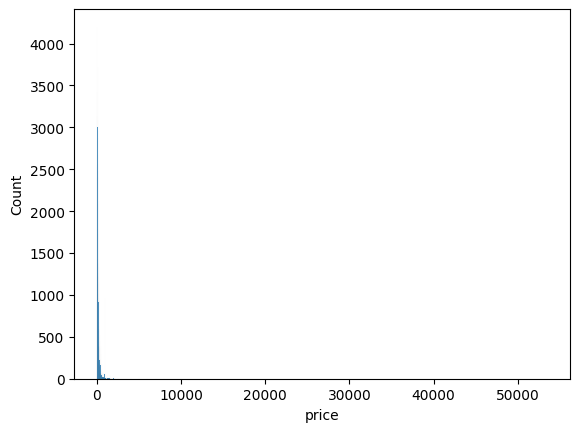

In [413]:
sns.histplot(x = dataL['price'])

In [414]:
filtered = dataL[~np.isnan(dataL['price'])]['price']
perc = np.percentile(filtered, 95)
print('95% wartości price znajduje się w przedziale do: {0:.2f}'.format(perc))
dataL = dataL[dataL['price'] < perc]

95% wartości price znajduje się w przedziale do: 500.00


<Axes: xlabel='price', ylabel='Count'>

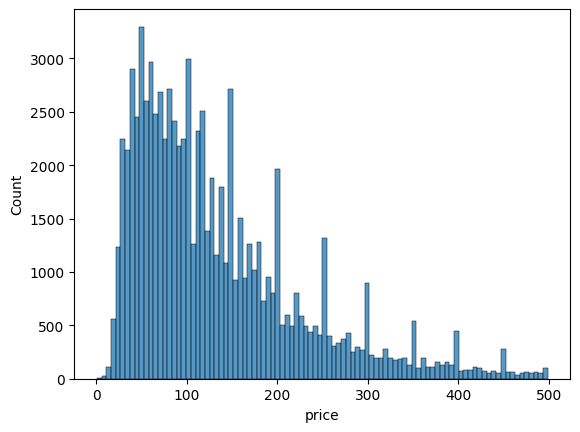

In [415]:
sns.histplot(x = dataL['price'])

In [416]:
dataL.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,198258,https://www.airbnb.com/rooms/198258,20231210055232,2023-12-10,city scrape,Rental unit in Barking · ★4.74 · 1 bedroom · 1...,"I live in Barking town centre, at one time the...",https://a0.muscache.com/pictures/airflow/Hosti...,967537,https://www.airbnb.com/users/show/967537,Ryan,2011-08-14,"Barking, United Kingdom","Do the Math\r\n\r\nHi all, im just a crazy kid...",within an hour,1.00,0.75,False,https://a0.muscache.com/im/pictures/user/360a7...,https://a0.muscache.com/im/pictures/user/360a7...,NaN,1.00,1.00,"['email', 'phone']",True,True,"Barking, London, United Kingdom",Barking and Dagenham,51.53,0.08,Private room in rental unit,Private room,1,1.00,1 shared bath,1.00,67.00,2,100,2.00,2.00,100.00,100.00,2.00,100.00,True,28,58,88,363,2023-12-10,41,1,0,2011-08-22,2023-03-16,4.74,4.83,4.25,4.80,4.88,4.45,4.68,False,1,0,1,0,0.27
1,33332,https://www.airbnb.com/rooms/33332,20231210055232,2023-12-10,city scrape,"Home in St Margaret's, Isleworth · ★4.40 · 1 ...",Peaceful and friendly.,https://a0.muscache.com/pictures/miso/Hosting-...,144444,https://www.airbnb.com/users/show/144444,Chi-Chi,2010-06-14,"Isleworth, United Kingdom",Quite busy and often in a different place ever...,NaN,0.92,0.84,False,https://a0.muscache.com/im/pictures/user/8028d...,https://a0.muscache.com/im/pictures/user/8028d...,LB of Hounslow,2.00,2.00,"['email', 'phone']",True,False,"St Margaret's, Isleworth, Middlesex, United K...",Richmond upon Thames,51.46,-0.32,Private room in home,Private room,2,1.00,1 private bath,1.00,140.00,2,21,2.00,2.00,21.00,21.00,2.00,21.00,True,30,60,90,365,2023-12-10,20,0,0,2010-10-16,2022-08-01,4.40,4.47,4.58,4.58,4.53,4.68,4.26,False,2,0,2,0,0.12
2,42010,https://www.airbnb.com/rooms/42010,20231210055232,2023-12-10,city scrape,Home in East Finchley · ★4.88 · 1 bedroom · 1 ...,We have a unique cinema called the Phoenix whi...,https://a0.muscache.com/pictures/airflow/Hosti...,157884,https://www.airbnb.com/users/show/157884,Agri & Roger,2010-07-04,"London, United Kingdom",We are a happy couple who live in a wonderful ...,within a few hours,1.00,1.00,True,https://a0.muscache.com/im/users/157884/profil...,https://a0.muscache.com/im/users/157884/profil...,LB of Haringey,2.00,4.00,"['email', 'phone']",True,True,"East Finchley, United Kingdom",Barnet,51.59,-0.16,Private room in home,Private room,2,1.00,1 shared bath,1.00,65.00,4,365,4.00,4.00,365.00,365.00,4.00,365.00,True,9,18,31,208,2023-12-10,556,29,3,2010-09-22,2023-12-03,4.88,4.89,4.83,4.96,4.95,4.73,4.87,True,2,0,2,0,3.45


In [417]:
dataL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83016 entries, 0 to 91777
Data columns (total 69 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            83016 non-null  int64         
 1   listing_url                                   83016 non-null  object        
 2   scrape_id                                     83016 non-null  int64         
 3   last_scraped                                  83016 non-null  datetime64[ns]
 4   source                                        83016 non-null  object        
 5   name                                          83016 non-null  object        
 6   neighborhood_overview                         45108 non-null  object        
 7   picture_url                                   83006 non-null  object        
 8   host_id                                       83016 non-null  int6

In [418]:
dataL.loc[:, dataL1].select_dtypes(include='number').isna().sum().sort_values(ascending=False) / len(dataL) * 100

reviews_per_month             23.09
review_scores_value           23.09
review_scores_location        23.08
review_scores_checkin         23.08
review_scores_communication   23.05
review_scores_accuracy        23.05
review_scores_cleanliness     23.04
review_scores_rating          23.02
beds                           1.22
host_listings_count            0.00
host_total_listings_count      0.00
maximum_nights_avg_ntm         0.00
host_response_rate             0.00
minimum_nights_avg_ntm         0.00
host_acceptance_rate           0.00
minimum_maximum_nights         0.00
maximum_minimum_nights         0.00
minimum_minimum_nights         0.00
price                          0.00
bathrooms                      0.00
maximum_maximum_nights         0.00
dtype: float64

In [419]:
dataL['reviews_per_month'].describe()

count   63844.00
mean        1.05
std         1.36
min         0.01
25%         0.18
50%         0.56
75%         1.36
max        48.59
Name: reviews_per_month, dtype: float64

In [420]:
# średnia 1 a max 48 -> są wartości odstające

In [421]:
dataH = dataL[(dataL['reviews_per_month'] < 1.5)]['reviews_per_month']

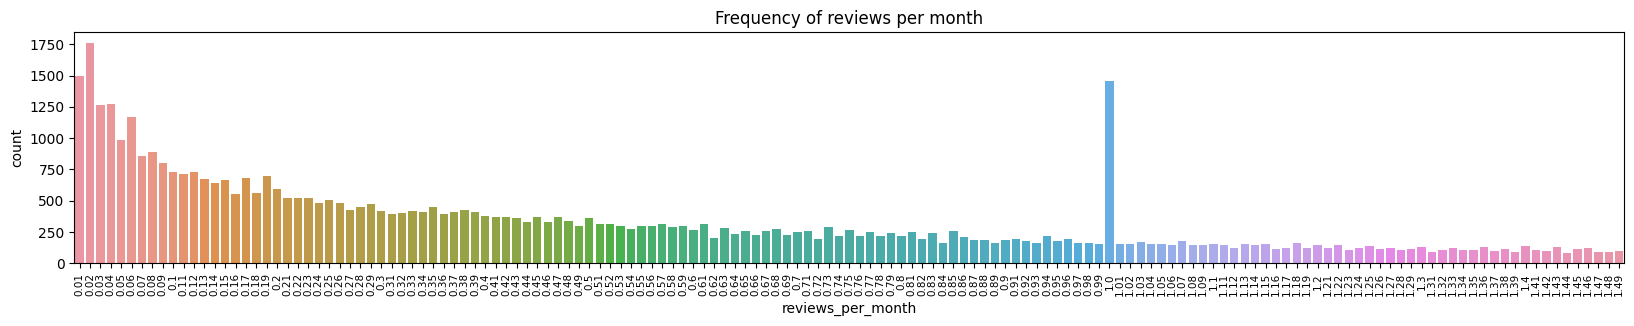

In [422]:
plt.figure(figsize=(20,3))
sns.countplot(x = dataH)
plt.title('Frequency of reviews per month')
plt.xticks(rotation=90, size=7.5)
plt.show()

In [423]:
dataH = dataL[(dataL['reviews_per_month'] < 50) & (dataL['reviews_per_month'] > 10)]['reviews_per_month']

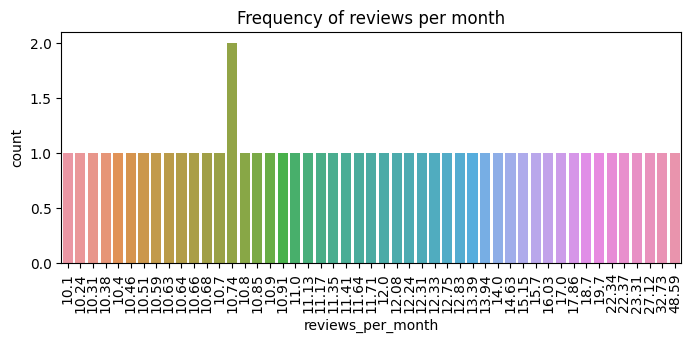

In [424]:
plt.figure(figsize=(8,3))
sns.countplot(x = dataH)
plt.title('Frequency of reviews per month')
plt.xticks(rotation=90)
plt.show()

In [425]:
# Trzeba wyfiltrować wartości NaN by policzyć percentyle - powyżej 95% wyniki można odrzucić
filtered = dataL[~np.isnan(dataL['reviews_per_month'])]['reviews_per_month']
perc = np.percentile(filtered, 95)
print('95% wartości reviews_per_month znajduje się w przedziale do: {0:.2f}'.format(perc))

95% wartości reviews_per_month znajduje się w przedziale do: 3.80


In [426]:
dataL['reviews_per_month'].isna().sum()

19172

In [427]:
filtered.describe()

count   63844.00
mean        1.05
std         1.36
min         0.01
25%         0.18
50%         0.56
75%         1.36
max        48.59
Name: reviews_per_month, dtype: float64

In [428]:
filtered = filtered[filtered < perc]

In [429]:
# można odrzucić takie outliery
dataL = dataL[dataL['reviews_per_month'] < perc]

In [430]:
dataL['reviews_per_month'].describe()

count   60640.00
mean        0.82
std         0.85
min         0.01
25%         0.16
50%         0.51
75%         1.16
max         3.79
Name: reviews_per_month, dtype: float64

In [431]:
dataL.loc[:, dataL1].select_dtypes(include='number').isna().sum().sort_values(ascending=False) / len(dataL) * 100

beds                          1.09
review_scores_value           0.08
review_scores_location        0.08
review_scores_checkin         0.08
review_scores_communication   0.04
review_scores_accuracy        0.04
review_scores_cleanliness     0.02
host_response_rate            0.00
minimum_nights_avg_ntm        0.00
review_scores_rating          0.00
maximum_nights_avg_ntm        0.00
maximum_maximum_nights        0.00
host_acceptance_rate          0.00
minimum_maximum_nights        0.00
maximum_minimum_nights        0.00
minimum_minimum_nights        0.00
price                         0.00
bathrooms                     0.00
host_total_listings_count     0.00
host_listings_count           0.00
reviews_per_month             0.00
dtype: float64

In [432]:
dataL['beds'].unique()

array([ 1.,  2.,  4.,  9.,  3.,  6., nan,  5.,  7.,  8., 10., 13., 50.,
       12., 11., 14., 15., 18., 28., 21.])

In [433]:
dataL['beds'].mode()

0   1.00
Name: beds, dtype: float64

In [434]:
dataL['beds'].fillna(1, inplace=True)

In [435]:
dataL['beds'].isna().sum()

0

In [436]:
# review
rev = ['review_scores_value', 'review_scores_location', 'review_scores_checkin', 'review_scores_communication', 'review_scores_accuracy', 'review_scores_cleanliness']
dataL[rev].agg(['median', 'mean']).T

,median,mean
review_scores_value,4.75,4.60
review_scores_location,4.84,4.72
review_scores_checkin,4.94,4.78
review_scores_communication,4.97,4.80
review_scores_accuracy,4.88,4.72
review_scores_cleanliness,4.80,4.63


In [437]:
# wypełnimy to średnimi
for kol in rev:
  dataL[kol].fillna(dataL[kol].mean(), inplace=True)
dataL[rev].isna().sum()

review_scores_value            0
review_scores_location         0
review_scores_checkin          0
review_scores_communication    0
review_scores_accuracy         0
review_scores_cleanliness      0
dtype: int64

In [438]:
# sprawdzenie czy są jakiekolwiek wartości nan w typach numerycznych
dataL.select_dtypes(include='number').isna().sum().sum()

0

In [439]:
# z kategorycznych do analizy można wziąć: room_type, neighbourhood_cleansed
label_encoder = LabelEncoder()
dataL['room_type_encoded'] = label_encoder.fit_transform(dataL['room_type'])
dataL['neighbourhood_cleansed_encoded'] = label_encoder.fit_transform(dataL['neighbourhood_cleansed'])

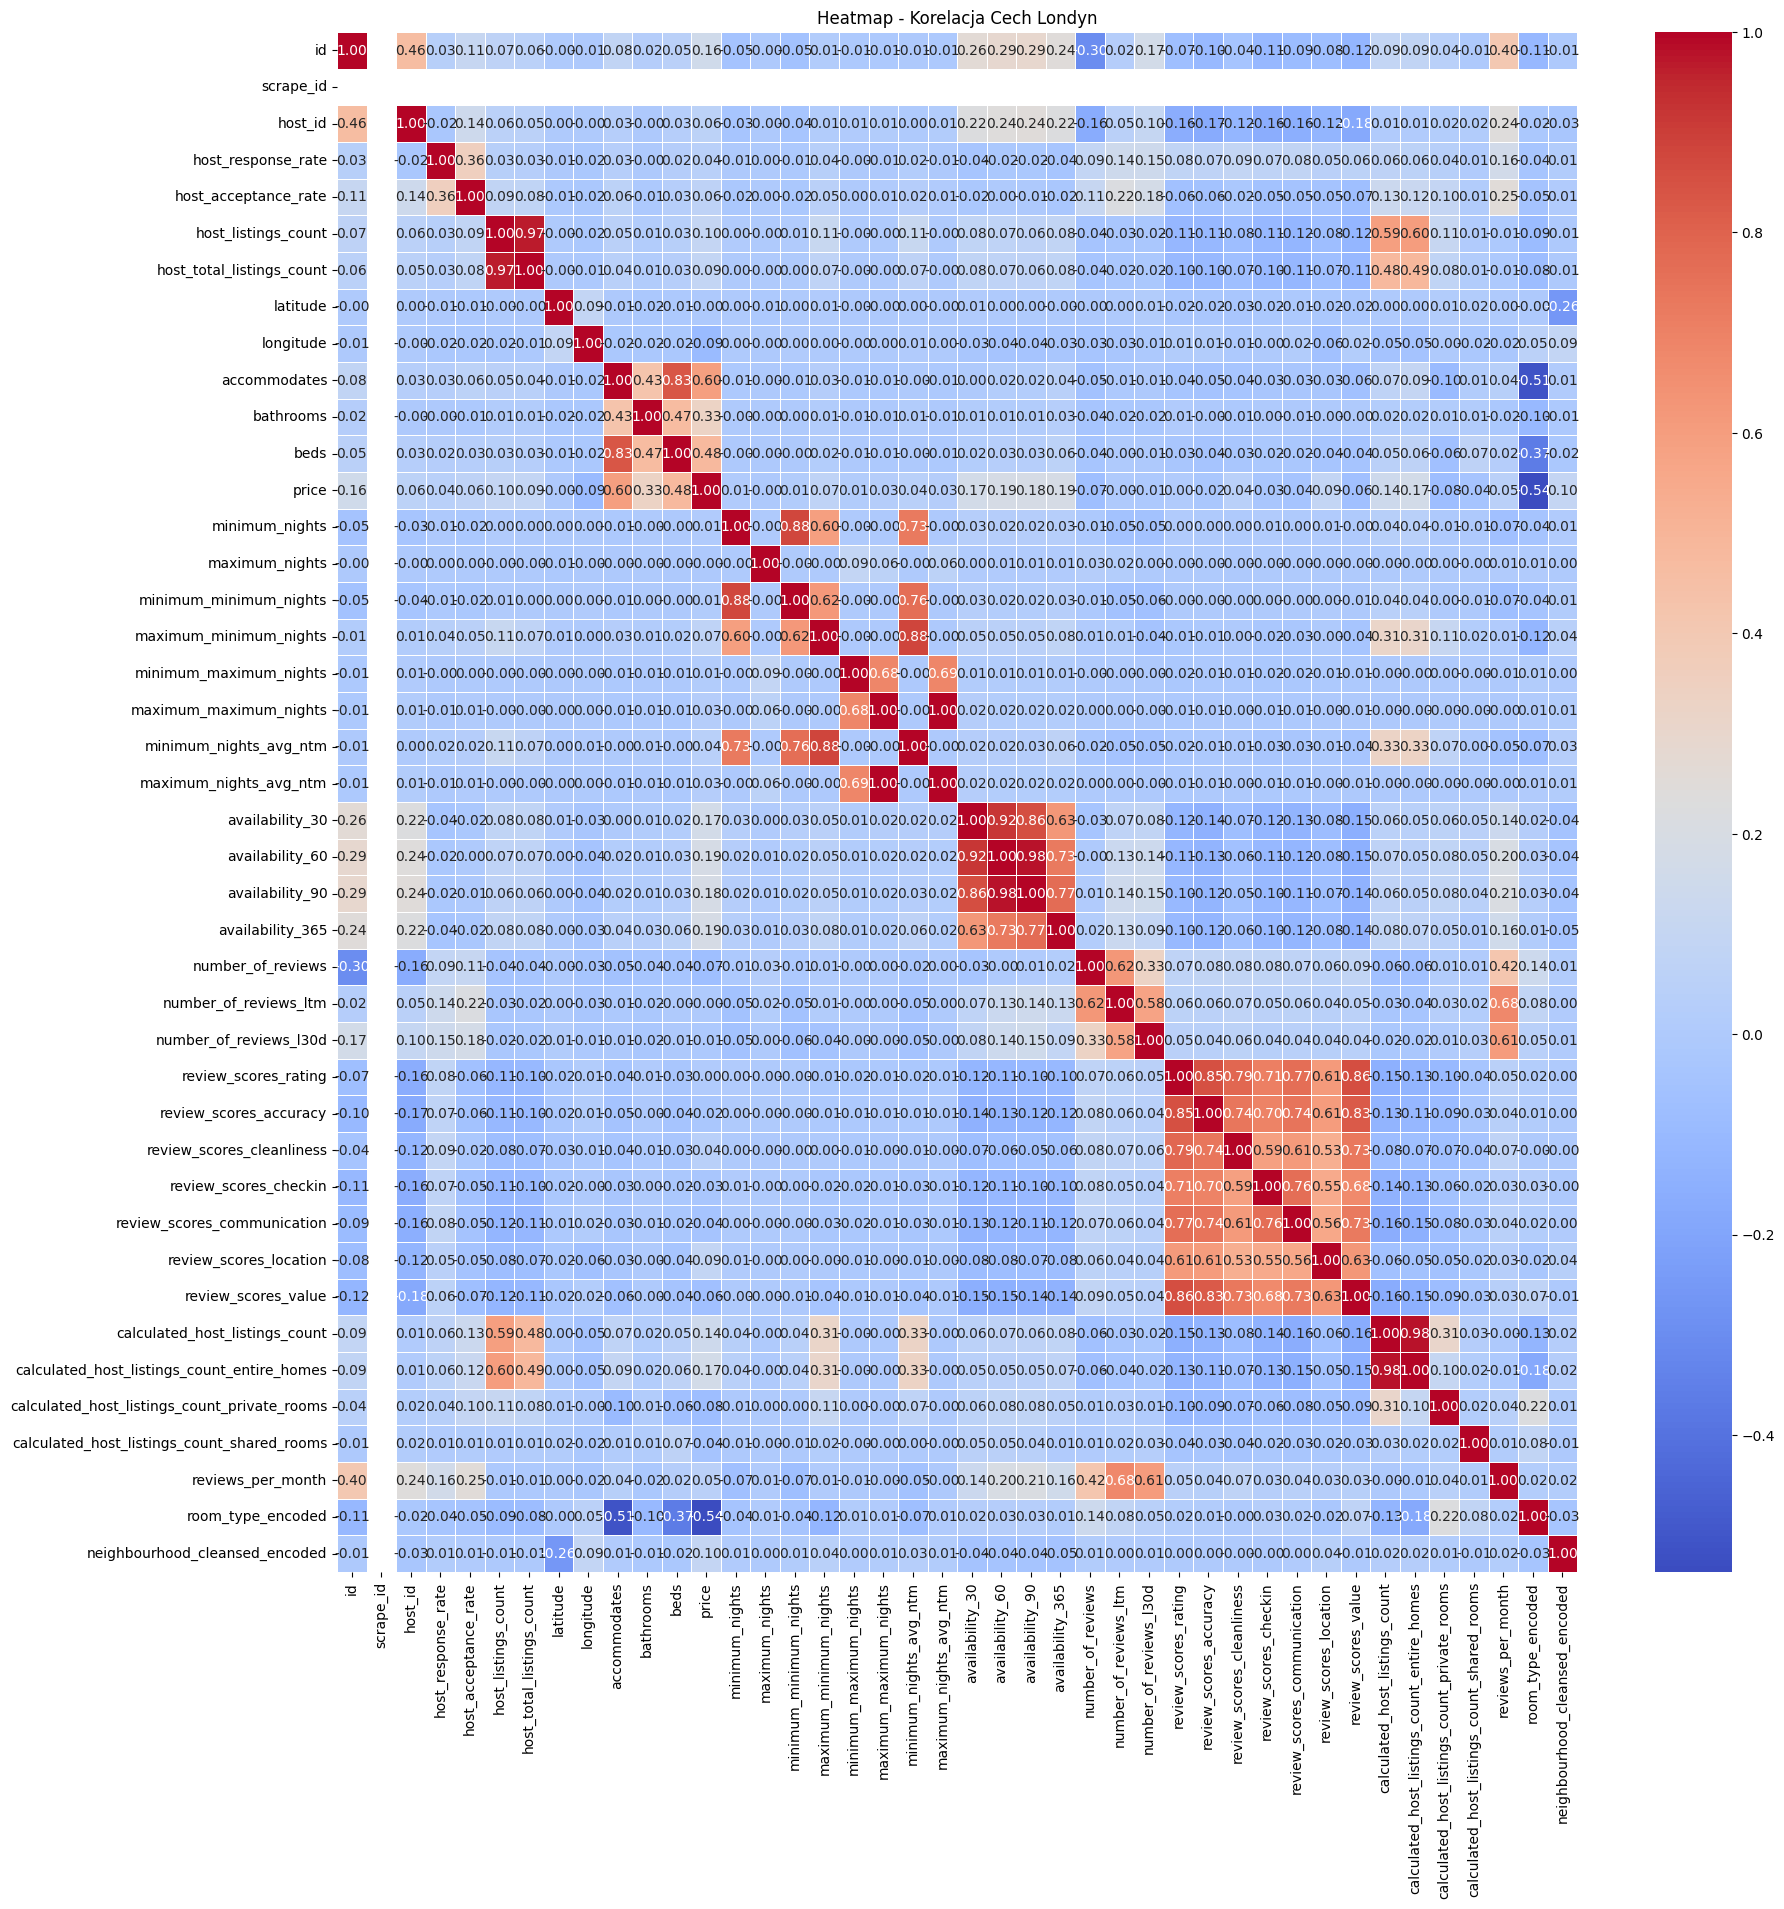

In [440]:
# Korelacja cech Londyn
plt.figure(figsize=(20, 20))
sns.heatmap(dataL.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap - Korelacja Cech Londyn')
plt.show()

In [441]:
all_num_feats = [x for x in dataL.dtypes[(dataL.dtypes != 'object') & (dataL.dtypes != 'datetime64[ns]')].index if not ('id' in x) and not ('price' in x)]

In [442]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [443]:
dataL[all_num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
host_response_rate,60640.00,0.94,0.14,0.00,0.92,1.00,1.00,1.00
host_acceptance_rate,60640.00,0.85,0.20,0.00,0.84,0.89,1.00,1.00
host_listings_count,60640.00,19.26,105.29,1.00,1.00,2.00,6.00,2475.00
host_total_listings_count,60640.00,36.55,236.57,1.00,1.00,3.00,10.00,5516.00
latitude,60640.00,51.51,0.05,51.30,51.48,51.51,51.54,51.68
longitude,60640.00,-0.13,0.10,-0.50,-0.19,-0.12,-0.07,0.30
accommodates,60640.00,3.12,1.84,1.00,2.00,2.00,4.00,16.00
bathrooms,60640.00,1.29,0.57,0.00,1.00,1.00,1.50,48.00
beds,60640.00,1.76,1.17,1.00,1.00,1.00,2.00,50.00
minimum_nights,60640.00,5.05,20.00,1.00,1.00,2.00,4.00,1000.00


In [444]:
# usuwanie wartości znacząco odstającej powyżej 95 percentyla

dataL = dataL[dataL['maximum_nights'] <= np.percentile(dataL['maximum_nights'], 95)]

## Regresja liniowa

In [445]:
# Sprawdzenie czy wszystkie dane typów innych niż object nie mają wartości NaN
dataL.dtypes[dataL.dtypes != 'object'].isna().sum()

0

In [446]:
dataL.dtypes[(dataL.dtypes != 'object') & (dataL.dtypes != 'datetime64[ns]')]

id                                                int64
scrape_id                                         int64
host_id                                           int64
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
latitude                                        float64
longitude                                       float64
accommodates                                      int64
bathrooms                                       float64
beds                                            float64
price                                           float64
minimum_nights                                    int64
maximum_nights                                  

In [447]:
# get all numeric - just string creation
" + ".join(all_num_feats)

'host_response_rate + host_acceptance_rate + host_is_superhost + host_listings_count + host_total_listings_count + host_has_profile_pic + latitude + longitude + accommodates + bathrooms + beds + minimum_nights + maximum_nights + minimum_minimum_nights + maximum_minimum_nights + minimum_maximum_nights + maximum_maximum_nights + minimum_nights_avg_ntm + maximum_nights_avg_ntm + has_availability + availability_30 + availability_60 + availability_90 + availability_365 + number_of_reviews + number_of_reviews_ltm + number_of_reviews_l30d + review_scores_rating + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_location + review_scores_value + instant_bookable + calculated_host_listings_count + calculated_host_listings_count_entire_homes + calculated_host_listings_count_private_rooms + calculated_host_listings_count_shared_rooms + reviews_per_month + room_type_encoded + neighbourhood_cleansed_encoded'

In [448]:
model = smf.ols(
    '''
    price ~ host_response_rate +
    host_acceptance_rate +
    host_is_superhost +
    host_listings_count +
    host_total_listings_count +
    host_has_profile_pic +
    latitude +
    longitude +
    accommodates +
    bathrooms +
    beds +
    minimum_nights +
    maximum_nights +
    minimum_minimum_nights +
    maximum_minimum_nights +
    minimum_maximum_nights +
    maximum_maximum_nights +
    minimum_nights_avg_ntm +
    maximum_nights_avg_ntm +
    has_availability +
    availability_30 +
    availability_60 +
    availability_90 +
    availability_365 +
    number_of_reviews +
    number_of_reviews_ltm +
    number_of_reviews_l30d +
    review_scores_rating +
    review_scores_accuracy +
    review_scores_cleanliness +
    review_scores_checkin +
    review_scores_communication +
    review_scores_location +
    review_scores_value +
    instant_bookable +
    calculated_host_listings_count +
    calculated_host_listings_count_entire_homes +
    calculated_host_listings_count_private_rooms +
    calculated_host_listings_count_shared_rooms +
    reviews_per_month +
    room_type_encoded
    ''', data = dataL).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     1695.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:49:51   Log-Likelihood:            -3.3704e+05
No. Observations:               60633   AIC:                         6.742e+05
Df Residuals:                   60591   BIC:                         6.745e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [449]:
dataL_scaled = dataL.copy()
scaler = StandardScaler()
dataL_scaled[all_num_feats] = scaler.fit_transform(dataL_scaled[all_num_feats])
dataL_scaled[all_num_feats]

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,latitude,longitude,accommodates,bathrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded,neighbourhood_cleansed_encoded
0,0.46,-0.48,-0.50,-0.17,-0.15,0.15,0.51,2.09,-1.15,-0.51,-0.65,-0.15,-0.90,-0.14,-0.25,-0.01,-0.02,-0.19,-0.02,0.60,1.93,1.65,1.53,1.82,0.48,-0.54,-0.47,0.14,0.23,-0.70,0.04,0.17,-0.64,0.15,-0.62,-0.30,-0.28,-0.14,-0.07,-0.64,1.32,-1.93
1,-0.12,-0.03,-0.50,-0.16,-0.15,0.15,-0.92,-1.99,-0.61,-0.51,-0.65,-0.15,-1.07,-0.14,-0.25,-0.01,-0.02,-0.19,-0.02,0.60,2.13,1.74,1.59,1.84,-0.05,-0.64,-0.47,-0.52,-0.50,-0.09,-0.45,-0.62,-0.09,-0.64,-0.62,-0.27,-0.28,-0.01,-0.07,-0.82,1.32,0.76
2,0.46,0.75,2.00,-0.16,-0.14,0.15,1.56,-0.38,-0.61,-0.51,-0.65,-0.05,-0.33,-0.03,-0.19,-0.01,-0.02,-0.11,-0.02,0.60,0.04,-0.15,-0.10,0.66,13.59,2.27,2.37,0.41,0.35,0.37,0.40,0.33,0.03,0.51,1.60,-0.27,-0.28,-0.01,-0.07,3.09,1.32,-1.82
3,-0.12,0.75,-0.50,-0.17,-0.15,0.15,0.11,-0.74,-0.07,0.36,-0.65,0.45,-0.33,0.50,0.13,-0.01,-0.02,0.28,-0.02,-1.66,-0.86,-0.95,-0.99,-0.90,-0.41,-0.64,-0.47,0.31,0.23,0.68,0.49,0.44,0.66,0.43,-0.62,-0.30,-0.25,-0.27,-0.07,-0.91,-0.75,0.03
4,-0.26,0.01,-0.50,-0.15,-0.13,0.15,1.19,0.15,0.48,-0.51,-0.65,-0.20,-0.98,-0.19,-0.29,-0.01,-0.02,-0.22,-0.02,0.60,1.34,1.38,1.36,1.78,2.82,0.87,0.48,-0.04,-0.08,0.02,0.27,0.24,0.03,-0.19,-0.62,-0.25,-0.23,-0.14,-0.07,0.09,-0.75,-0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91768,-0.26,0.60,-0.50,-0.13,-0.12,0.15,0.07,-0.62,0.48,-0.51,0.20,-0.20,-0.33,-0.19,-0.19,-0.01,-0.02,-0.15,-0.02,0.60,1.34,1.38,1.36,1.01,-0.53,-0.54,-0.47,0.64,0.57,-1.16,0.49,-1.83,0.66,0.75,1.60,-0.17,-0.12,-0.27,-0.07,-0.01,-0.75,1.37
91771,0.39,0.01,-0.50,0.47,0.28,0.15,0.22,-0.84,0.48,-0.51,0.20,-0.15,-0.73,-0.14,-0.16,-0.01,-0.02,-0.10,-0.02,0.60,0.44,-0.24,-0.53,-0.65,-0.46,-0.24,1.42,-2.75,-3.98,-3.01,-2.86,-1.83,-1.70,-3.48,-0.62,1.39,1.53,-0.27,-0.07,0.25,-0.75,0.03
91774,0.46,0.75,-0.50,-0.12,-0.10,0.15,-0.59,0.12,1.57,-0.51,1.06,-0.10,-1.07,-0.08,-0.10,-0.01,-0.02,-0.14,-0.02,0.60,1.64,0.17,-0.27,-0.71,-0.51,-0.44,-0.47,-3.24,-3.48,-3.01,-1.74,-1.83,-1.70,-3.01,1.60,-0.14,-0.09,-0.27,-0.07,-0.29,-0.75,0.24
91775,0.46,0.51,-0.50,-0.16,-0.15,0.15,-0.63,-0.54,2.11,0.36,1.91,-0.20,-0.33,-0.19,-0.29,-0.01,-0.02,-0.22,-0.02,0.60,0.24,0.89,0.96,0.80,-0.51,-0.44,-0.47,0.64,0.57,0.68,0.49,0.44,0.66,0.75,-0.62,-0.27,-0.23,-0.27,-0.07,-0.14,-0.75,0.03


In [450]:
dataL_subset = dataL_scaled.loc[:, all_num_feats + ['price']]

Xg = dataL_subset.loc[:,all_num_feats]
yg = np.array(dataL_subset.price)

X_train, X_test, y_train, y_test = train_test_split(Xg, yg, test_size=0.2)

In [451]:
# model z innej biblioteki - statsmodels.api, w tym przypadku trzeba dodać kolumnę stałych - add_constant
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     1376.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:49:52   Log-Likelihood:            -2.6911e+05
No. Observations:               48506   AIC:                         5.383e+05
Df Residuals:                   48463   BIC:                         5.387e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [452]:
all_feats = all_num_feats.copy()

In [453]:
# usunięcie cech

to_remove = ['minimum_nights_avg_ntm', 'availability_60', 'host_response_rate', 'calculated_host_listings_count_entire_homes',
             'number_of_reviews_ltm', 'host_listings_count', 'host_total_listings_count', 'beds']

variablesL = list(filter(lambda x: x not in to_remove, all_num_feats))

dataL_subset = dataL_scaled.loc[:, variablesL + ['price']]

Xg = dataL_subset.loc[:,variablesL]
yg = np.array(dataL_subset.price)

X_train, X_test, y_train, y_test = train_test_split(Xg, yg, test_size=0.2)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     1732.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:49:52   Log-Likelihood:            -2.6895e+05
No. Observations:               48506   AIC:                         5.380e+05
Df Residuals:                   48471   BIC:                         5.383e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [454]:
# Losowanie najlepszych cech

best_features = []
best_r2 = -1

for i in range(100):

    size = np.random.randint(1, len(dataL_subset.columns[:-1]) + 1)

    variables_sub = np.random.choice(dataL_subset.columns[:-1], size=size, replace=False)

    X = dataL_subset.loc[:,variables_sub]
    y = np.array(dataL_subset.price)
    model = sm.OLS(y, sm.add_constant(X)).fit()

    r2 = r2_score(y, model.predict(sm.add_constant(X)))

    if r2 > best_r2:
        best_r2L = r2
        best_featuresL = variables_sub
        best_sizeL=size

print("Najlepszy rozmiar:", best_sizeL)
print("Najlepsze cechy:", best_featuresL)
print("Najwyższy wynik R-squared:", best_r2L)

Najlepszy rozmiar: 27
Najlepsze cechy: ['maximum_nights' 'latitude' 'calculated_host_listings_count_shared_rooms'
 'instant_bookable' 'accommodates' 'review_scores_location'
 'maximum_nights_avg_ntm' 'number_of_reviews_l30d' 'host_acceptance_rate'
 'availability_90' 'host_has_profile_pic' 'reviews_per_month'
 'review_scores_communication' 'maximum_maximum_nights'
 'review_scores_rating' 'host_is_superhost' 'review_scores_value'
 'neighbourhood_cleansed_encoded' 'review_scores_checkin'
 'calculated_host_listings_count' 'has_availability'
 'maximum_minimum_nights' 'availability_365'
 'calculated_host_listings_count_private_rooms' 'review_scores_accuracy'
 'number_of_reviews' 'bathrooms']
Najwyższy wynik R-squared: 0.47551376474427354


In [457]:
best_featuresL = list(best_featuresL)
#best_features.remove('latitude')

In [458]:
dataL_subset_ed = dataL_scaled.loc[:, best_featuresL + ['price']]

Xg = dataL_subset_ed.loc[:,best_featuresL]
yg = np.array(dataL_subset_ed.price)

X_train, X_test, y_train, y_test = train_test_split(Xg, yg, test_size=0.2)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     1633.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:50:42   Log-Likelihood:            -2.7249e+05
No. Observations:               48506   AIC:                         5.450e+05
Df Residuals:                   48478   BIC:                         5.453e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

### Prediction

In [459]:
# predykcja na zbiorze testowym
y_pred = model.predict(X_test)

In [460]:
X_test.reset_index(drop=True, inplace=True)

In [461]:
dataL_model_preds = pd.concat([X_test, pd.Series(y_test).rename('price'), model.predict(X_test).rename('predict')], axis = 1)

In [462]:
dataL_model_preds.tail(3)

,const,maximum_nights,latitude,calculated_host_listings_count_shared_rooms,instant_bookable,accommodates,review_scores_location,maximum_nights_avg_ntm,number_of_reviews_l30d,host_acceptance_rate,availability_90,host_has_profile_pic,reviews_per_month,review_scores_communication,maximum_maximum_nights,review_scores_rating,host_is_superhost,review_scores_value,neighbourhood_cleansed_encoded,review_scores_checkin,calculated_host_listings_count,has_availability,maximum_minimum_nights,availability_365,calculated_host_listings_count_private_rooms,review_scores_accuracy,number_of_reviews,bathrooms,price,predict
12124,1.00,1.30,-1.40,-0.07,-0.62,-0.61,0.66,-0.02,-0.47,-0.03,-0.99,0.15,-0.92,0.44,-0.02,0.64,-0.50,0.75,1.27,0.49,-0.30,-1.66,-0.29,-0.90,-0.27,0.57,-0.53,-0.51,85.00,78.85
12125,1.00,-1.05,0.27,-0.07,-0.62,-0.61,0.66,-0.02,-0.47,-0.03,-0.99,0.15,-0.61,0.44,-0.02,-0.04,-0.50,-0.10,-1.41,0.49,-0.17,-1.66,-0.29,-0.90,0.12,0.06,-0.05,-0.51,68.00,58.34
12126,1.00,-0.33,0.94,-0.07,-0.62,0.48,0.59,-0.02,-0.47,0.75,0.76,0.15,1.43,0.44,-0.02,0.45,2.00,0.20,-1.41,0.42,-0.30,0.60,-0.25,-0.04,-0.27,0.18,0.23,0.36,226.00,179.51


### RMSE

In [463]:
# na zbiorze treningowym
np.sqrt(model.mse_resid)

66.62204500466395

In [464]:
# na zbiorze testowym
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
rmse

66.77775364007199

### Residuals

In [465]:
# na zbiorze testowym
dataL_model_preds['residuals'] = dataL_model_preds['price'] - dataL_model_preds['predict']
dataL_model_preds.head(3)

,const,maximum_nights,latitude,calculated_host_listings_count_shared_rooms,instant_bookable,accommodates,review_scores_location,maximum_nights_avg_ntm,number_of_reviews_l30d,host_acceptance_rate,availability_90,host_has_profile_pic,reviews_per_month,review_scores_communication,maximum_maximum_nights,review_scores_rating,host_is_superhost,review_scores_value,neighbourhood_cleansed_encoded,review_scores_checkin,calculated_host_listings_count,has_availability,maximum_minimum_nights,availability_365,calculated_host_listings_count_private_rooms,review_scores_accuracy,number_of_reviews,bathrooms,price,predict,residuals
0,1.00,-1.05,-0.53,-0.07,-0.62,-0.61,0.66,-0.02,0.48,0.06,-0.16,0.15,-0.77,0.44,-0.02,0.64,-0.50,0.75,1.27,0.49,-0.30,0.60,0.38,-0.68,-0.27,0.57,-0.51,-0.51,136.00,120.14,15.86
1,1.00,1.30,0.04,-0.07,-0.62,0.48,0.66,-0.02,-0.47,-0.33,1.56,0.15,-0.77,0.44,-0.02,0.64,-0.50,0.75,-0.69,0.49,-0.22,0.60,-0.25,1.83,-0.27,0.57,-0.53,2.98,350.00,210.89,139.11
2,1.00,-1.08,-0.66,-0.07,-0.62,-0.61,-0.21,-0.02,-0.47,0.75,-0.99,-6.55,1.36,0.44,-0.02,0.64,-0.50,0.52,0.24,0.49,-0.30,-1.66,-0.25,-0.90,-0.27,0.57,-0.36,-0.51,160.00,46.04,113.96


In [466]:
px.histogram(dataL_model_preds['residuals'])

In [467]:
dataL_model_preds = dataL_model_preds[(dataL_model_preds['predict'] < 500)]

Text(0, 0.5, 'Residuals')

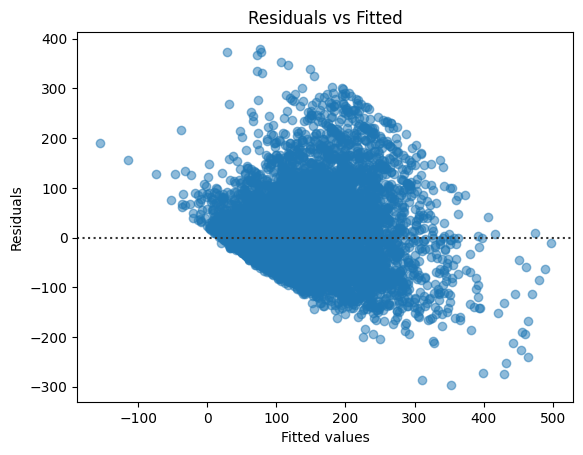

In [468]:
#  Residual plot
plot = sns.residplot(x=dataL_model_preds['predict'], y=dataL_model_preds['residuals'], data=dataL_model_preds,
                     scatter_kws={'alpha': 0.5})
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals')

## Lasso

(0.0016701560628837255,
 89.92698845409679,
 -17.769927619143527,
 51.037237018631295)

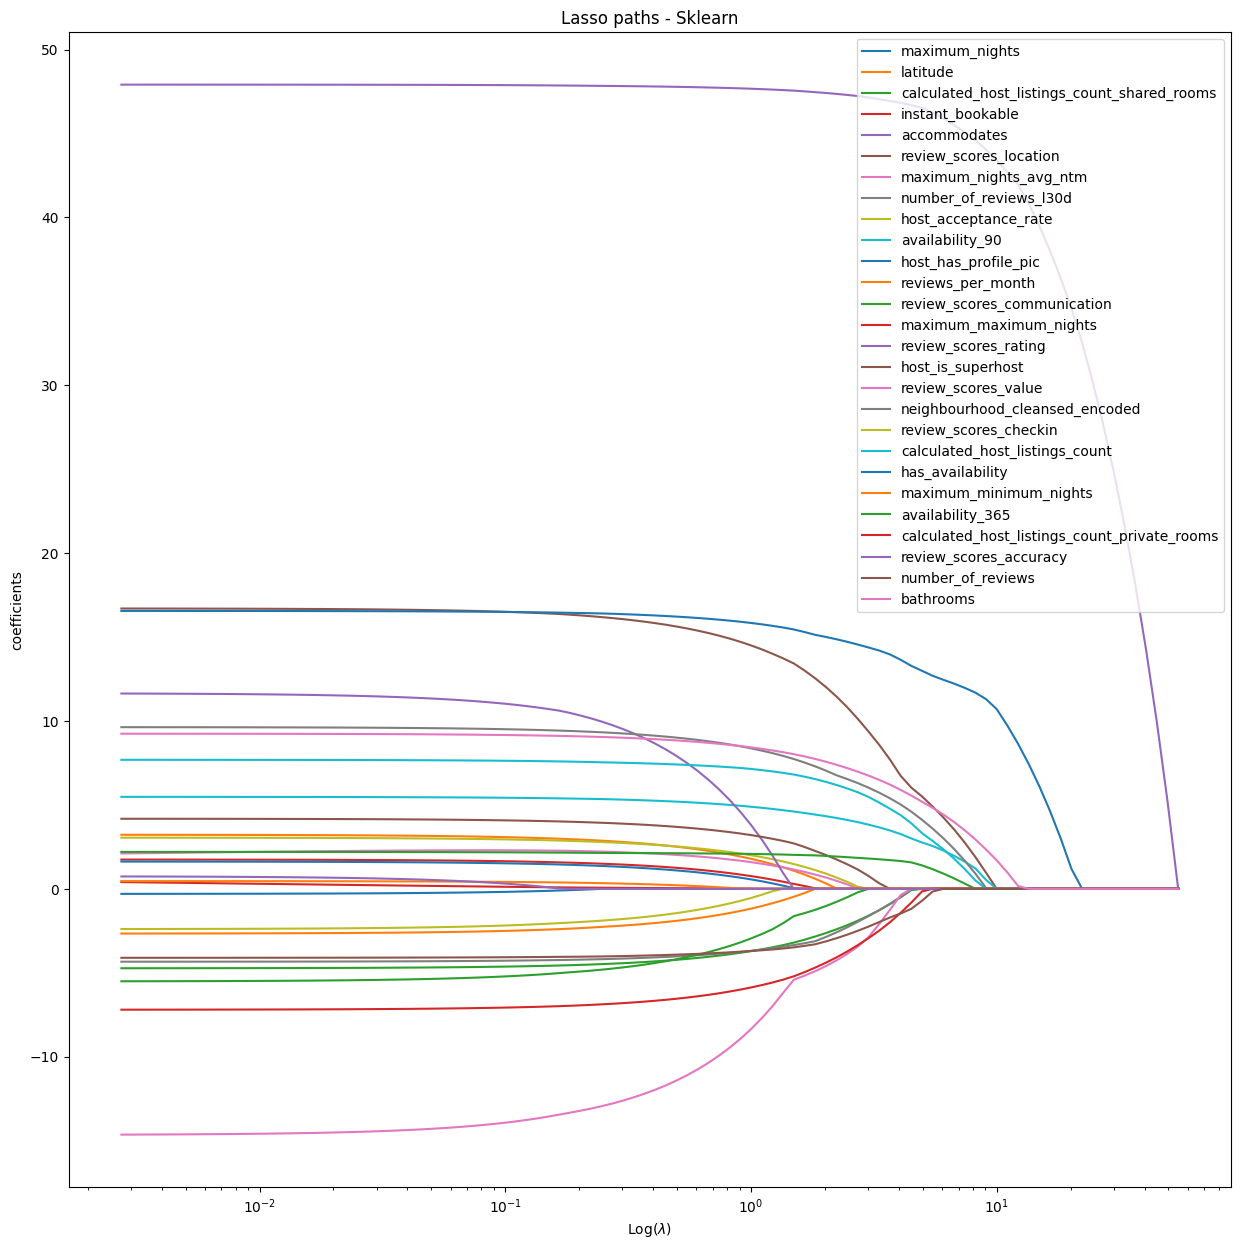

In [469]:
# Lasso

X = dataL_subset.loc[:,best_featuresL]
y = np.array(dataL_subset.price)

alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps = 5e-5)

# Display results
plt.figure(figsize = (15,15))

for i in range(X.shape[1]):
    plt.plot(alphas_lasso, coefs_lasso[i], label = best_featuresL[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')

## XGBoost

In [595]:
for i in range(100):

    size = np.random.randint(1, len(dataL_subset.columns[:-1]) + 1)

    variables_sub = np.random.choice(dataL_subset.columns[:-1], size=size, replace=False)

    X = dataL_subset.loc[:, variables_sub]
    y = np.array(dataL_subset['price'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = xgboost.XGBRegressor(objective ='reg:squarederror')
    model.fit(X_train, y_train)

    # Oblicz r2 na zbiorze testowym
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    if r2 > best_r2:
        best_r2LX = r2
        best_featuresLX = variables_sub
        best_sizeLX = size

print("Najlepsza ilość cech:", best_sizeLX)
print("Najlepsze cechy:", best_featuresLX)
print("Najwyższy wynik R-squared:", best_r2LX)

Najlepsza ilość cech: 5
Najlepsze cechy: ['calculated_host_listings_count' 'number_of_reviews' 'availability_365'
 'minimum_maximum_nights' 'accommodates']
Najwyższy wynik R-squared: 0.4938776136479862


In [596]:
best_featuresLX = list(best_featuresLX)

In [597]:
dataL_subset = dataL.loc[:, best_featuresLX + ['price']]

X = dataL_subset.loc[:, best_featuresLX]
y = np.array(dataL_subset['price'])

X_trainLX, X_testLX, y_trainLX, y_testLX = train_test_split(X, y, test_size=0.2, random_state=42)

In [598]:
modelLX = xgboost.XGBRegressor(n_estimators=200, verbosity=1)
modelLX.fit(X_trainLX, y_trainLX)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [599]:
predictedLX = modelLX.predict(X_testLX)
list(zip(y_test[0:10], predicted[0:10]))

[(25.0, 43.974155),
 (30.0, 26.776508),
 (178.0, 183.93904),
 (155.0, 123.523056),
 (135.0, 132.34),
 (191.0, 175.28244),
 (94.0, 89.80665),
 (35.0, 52.305447),
 (80.0, 80.827705),
 (36.0, 39.246212)]

In [600]:
px.histogram(y_testLX - predictedLX)

In [601]:
# rmse
np.sqrt(mean_squared_error(y_testLX, predictedLX))

65.16413827508379

In [602]:
# explained variance
explained_variance_score(y_testLX, predictedLX)

0.4903464864292374

In [603]:
# r2
r2_score(y_testLX, predictedLX)

0.4903230710019062

## XAI - Shapley values

In [604]:
#Playing with Shapley values
explainerL = shap.TreeExplainer(modelLX)
shap_valuesL = explainerL.shap_values(X_testLX)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[11:12:27] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.



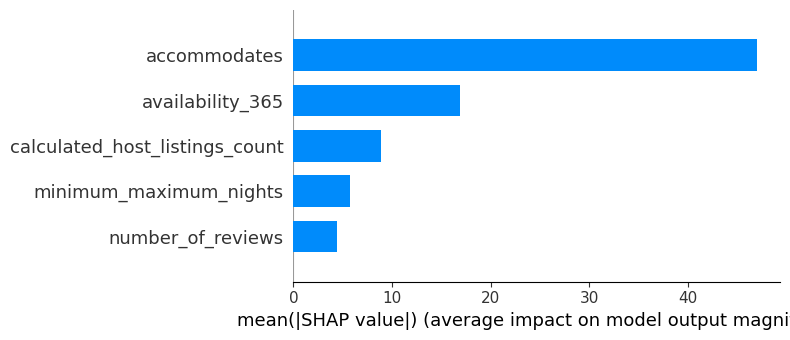

In [605]:
shap.summary_plot(shap_valuesL, X_testLX, plot_type="bar")

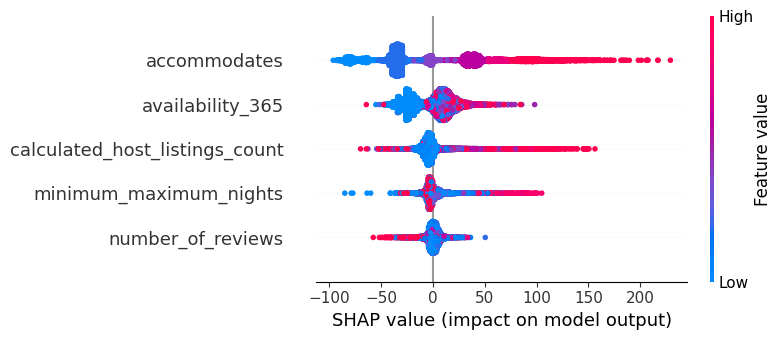

In [606]:
#From official documentation:
'''The summary plot combines feature importance with feature effects.
Each point on the summary plot is a Shapley value for a feature and an instance.
The position on the y-axis is determined by the feature and on the x-axis by the Shapley value.
The color represents the value of the feature from low to high.
Overlapping points are jittered in y-axis direction, so we get a sense of the distribution
of the Shapley values per feature. The features are ordered according to their importance.'''
# So from this plot we can read that guests_included and bedrooms are the most important variables
#    and high number of guests_included/bedrooms is linked to higher price
shap.summary_plot(shap_valuesL, features=X_testLX, feature_names=X_testLX.columns)

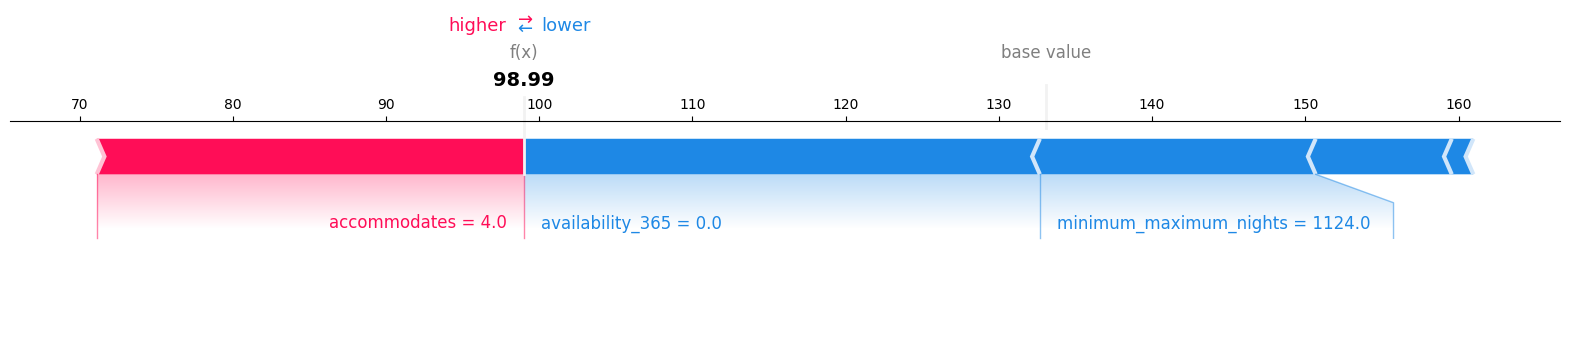

In [607]:
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])
shap.force_plot(explainerL.expected_value, shap_valuesL[60,:], np.round(X_testLX.iloc[60,:],2), matplotlib=True)

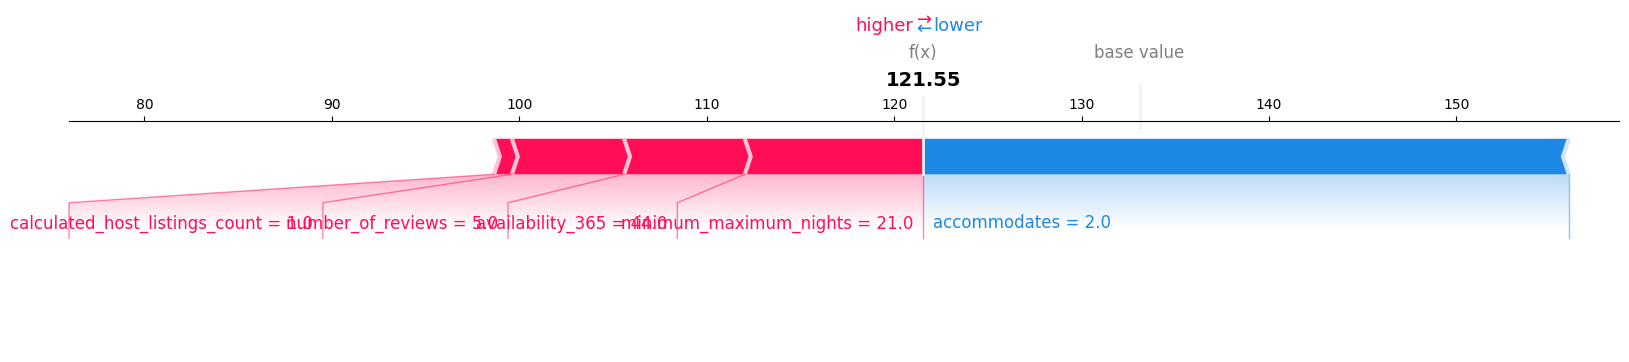

In [608]:
shap.force_plot(explainerL.expected_value, shap_valuesL[610,:], np.round(X_testLX.iloc[610,:],2), matplotlib=True)

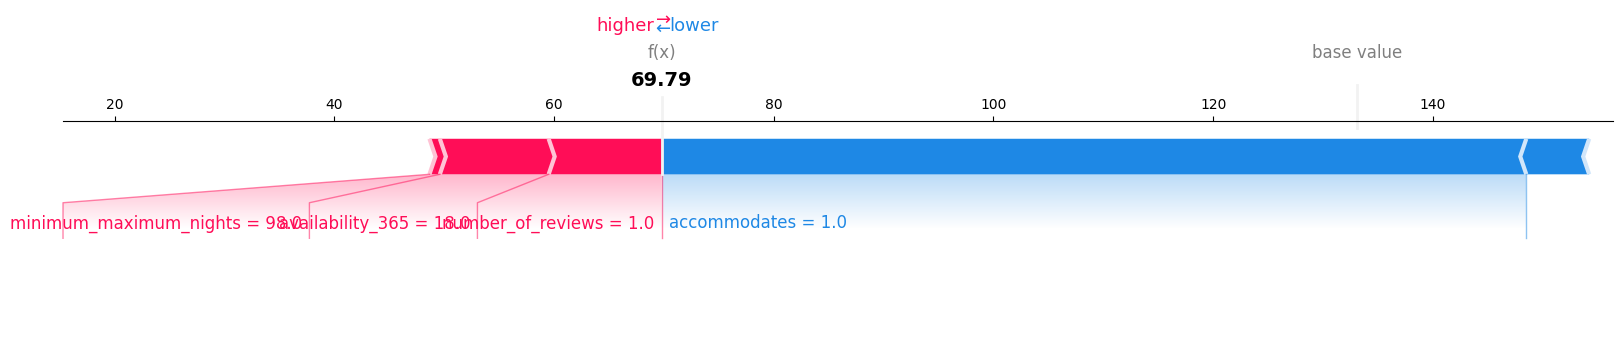

In [609]:
shap.force_plot(explainerL.expected_value, shap_valuesL[1200,:], np.round(X_testLX.iloc[1200,:],2), matplotlib=True)

# Toronto

## Obróbka danych

In [484]:
dataT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19994 entries, 0 to 19993
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19994 non-null  int64  
 1   listing_url                                   19994 non-null  object 
 2   scrape_id                                     19994 non-null  int64  
 3   last_scraped                                  19994 non-null  object 
 4   source                                        19994 non-null  object 
 5   name                                          19994 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         11269 non-null  object 
 8   picture_url                                   19994 non-null  object 
 9   host_id                                       19994 non-null 

In [485]:
dataT.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1002736951366032648,https://www.airbnb.com/rooms/1002736951366032648,20231212054246,2023-12-12,city scrape,Bungalow in Toronto · ★New · 1 bedroom · 1 bed...,NaN,NaN,https://a0.muscache.com/pictures/8c0a277f-2ce5...,273730029,https://www.airbnb.com/users/show/273730029,Tran Thien Ly,2019-07-05,"Toronto, Canada","""The most beautiful things in life are not thi...",within an hour,100%,98%,NaN,https://a0.muscache.com/im/pictures/user/fe5d9...,https://a0.muscache.com/im/pictures/user/fe5d9...,Westmount,5.00,6.00,"['email', 'phone']",t,t,NaN,Humber Heights-Westmount,NaN,43.69,-79.52,Private room in bungalow,Private room,2,NaN,1 bath,NaN,1.00,[],$72.00,28,365,28,28,365,365,28.00,365.00,NaN,t,21,51,81,94,2023-12-12,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,3,0,3,0,NaN
1,716133555965651038,https://www.airbnb.com/rooms/716133555965651038,20231212054246,2023-12-12,city scrape,Townhouse in North York · 1 bedroom · 2 beds ·...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,474878080,https://www.airbnb.com/users/show/474878080,Huu-Hoa,2022-08-13,"Toronto, Canada",NaN,within an hour,100%,95%,t,https://a0.muscache.com/im/pictures/user/ca5fb...,https://a0.muscache.com/im/pictures/user/ca5fb...,NaN,4.00,5.00,"['email', 'phone']",t,t,NaN,Downsview-Roding-CFB,NaN,43.74,-79.47,Private room in townhouse,Private room,3,NaN,1 private bath,NaN,2.00,[],$110.00,28,365,28,28,1125,1125,28.00,1125.00,NaN,t,30,60,90,365,2023-12-12,1,0,0,2022-11-24,2022-11-24,5.00,5.00,5.00,5.00,5.00,5.00,5.00,STR-2208-FWRHHD,t,4,0,4,0,0.08
2,27278791,https://www.airbnb.com/rooms/27278791,20231212054246,2023-12-12,city scrape,Home in Toronto · ★4.91 · 1 bedroom · 2 beds ·...,NaN,This house is on a very quiet street of the Ce...,https://a0.muscache.com/pictures/miso/Hosting-...,141166875,https://www.airbnb.com/users/show/141166875,Andrew,2017-07-18,"Toronto, Canada",NaN,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/247f8...,https://a0.muscache.com/im/pictures/user/247f8...,The Westway,3.00,7.00,"['email', 'phone']",t,t,"Toronto, Ontario, Canada",Kingsview Village-The Westway,NaN,43.70,-79.54,Private room in home,Private room,4,NaN,1 private bath,NaN,2.00,[],$104.00,1,89,1,2,1125,1125,1.50,1125.00,NaN,t,18,48,78,334,2023-12-12,503,107,15,2018-10-19,2023-12-11,4.91,4.94,4.92,4.97,4.97,4.90,4.87,STR-2009-GQYXPG,f,3,0,3,0,8.02


In [486]:
# Procentowy wynik wartości NaN w kolumnach
dataT1 = dataT.isna().sum() > 0
dataT.loc[:, dataT1].isna().sum().sort_values(ascending=False) / len(dataT) * 100

description                    100.00
bathrooms                      100.00
calendar_updated               100.00
neighbourhood_group_cleansed   100.00
bedrooms                        99.98
host_neighbourhood              57.47
license                         53.67
host_about                      52.22
neighborhood_overview           43.64
neighbourhood                   43.63
host_response_time              32.59
host_response_rate              32.59
host_acceptance_rate            26.98
reviews_per_month               25.70
last_review                     25.70
first_review                    25.70
review_scores_checkin           25.67
review_scores_location          25.67
review_scores_accuracy          25.66
review_scores_value             25.66
review_scores_communication     25.66
review_scores_cleanliness       25.65
review_scores_rating            25.65
host_location                   24.81
has_availability                 5.13
price                            5.13
host_is_supe

In [487]:
# usuwanie niepotrzebnych kolumn z największymi brakami w danych
dataT.drop([
    'description',
    'neighbourhood_group_cleansed', # zamiast tego można użyć neighbourhood_cleansed
    'host_neighbourhood',
    'calendar_updated',
    'bedrooms', # nie ma skąd wziąć tej informacji
    'amenities' # puste tabele
    ], axis=1, inplace=True)

In [488]:
# bathrooms_text na bathrooms
dataT['bathrooms_text'].unique()

array(['1 bath', '1 private bath', '1 shared bath', '1.5 baths',
       '2 shared baths', '2.5 shared baths', '2 baths', '0 baths',
       '1.5 shared baths', '2.5 baths', '4 baths', '3.5 baths',
       '3 shared baths', '3 baths', '5.5 baths', '5 baths',
       'Private half-bath', 'Shared half-bath', '0 shared baths',
       '4.5 baths', nan, 'Half-bath', '6.5 baths', '6 baths',
       '3.5 shared baths', '8 baths', '7 baths', '4 shared baths',
       '8.5 baths', '4.5 shared baths', '10.5 baths'], dtype=object)

In [489]:
dataT['bathrooms'] = dataT['bathrooms_text'].str.extract('([\d.]+)').astype(float)
dataT['bathrooms'] = np.where(dataT['bathrooms_text'] == 'Half-bath', 0.5, dataT['bathrooms'])

In [490]:
# zakładamy że jak nie ma wprowadzonej to jest 1
dataT['bathrooms'].mode()

0   1.00
Name: bathrooms, dtype: float64

In [491]:
dataT['bathrooms'].fillna(1, inplace=True)
dataT['bathrooms'].unique()

array([ 1. ,  1.5,  2. ,  2.5,  0. ,  4. ,  3.5,  3. ,  5.5,  5. ,  4.5,
        0.5,  6.5,  6. ,  8. ,  7. ,  8.5, 10.5])

In [492]:
# zamiana w kolumnach t/f na 1/0 zakładając, że jeśli NaN to f

dataT[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']].head(3)

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable
0,NaN,t,t,t,f
1,t,t,t,t,t
2,t,t,t,t,f


In [493]:
mapping_func = {'t' : 1, 'f' : 0}
kolumnytf = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']
dataT[kolumnytf] = dataT[kolumnytf].applymap(lambda x: mapping_func.get(x, 0)).astype(bool)

In [494]:
# wartości procentowe na ułamki
dataT[['host_response_rate', 'host_acceptance_rate']].head(3)

,host_response_rate,host_acceptance_rate
0,100%,98%
1,100%,95%
2,100%,99%


In [495]:
kolumnypr = ['host_response_rate', 'host_acceptance_rate']
dataT[kolumnypr] = dataT[kolumnypr].apply(lambda x: x.str.replace('%','').astype(float) / 100)

In [496]:
dataT[kolumnypr].isna().sum() / len(dataT[kolumnypr]) * 100

host_response_rate     32.59
host_acceptance_rate   26.98
dtype: float64

In [497]:
# Dane zostaną zamienione wartościami średnimi
dataT[kolumnypr].describe()

,host_response_rate,host_acceptance_rate
count,13477.00,14599.00
mean,0.95,0.85
std,0.17,0.24
min,0.00,0.00
25%,1.00,0.82
50%,1.00,0.97
75%,1.00,1.00
max,1.00,1.00


In [498]:
dataT['host_response_rate'].fillna(round(dataT['host_response_rate'].mean(), 2), inplace=True)
dataT['host_acceptance_rate'].fillna(round(dataT['host_acceptance_rate'].mean(), 2), inplace=True)

In [499]:
# daty
kolumnydat = ['last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 'last_review']
dataT[kolumnydat].head(3)

,last_scraped,host_since,calendar_last_scraped,first_review,last_review
0,2023-12-12,2019-07-05,2023-12-12,NaN,NaN
1,2023-12-12,2022-08-13,2023-12-12,2022-11-24,2022-11-24
2,2023-12-12,2017-07-18,2023-12-12,2018-10-19,2023-12-11


In [500]:
dataT[kolumnydat] = dataT[kolumnydat].apply(pd.to_datetime)

In [501]:
# cena
dataT['price'] = dataT['price'].str.replace('[$,]','').astype(float)

<ipython-input-501-8ccdadc2032d>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [502]:
dataT['price'].describe()

count   18968.00
mean      175.75
std       311.45
min        12.00
25%        75.00
50%       120.00
75%       196.00
max     12400.00
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

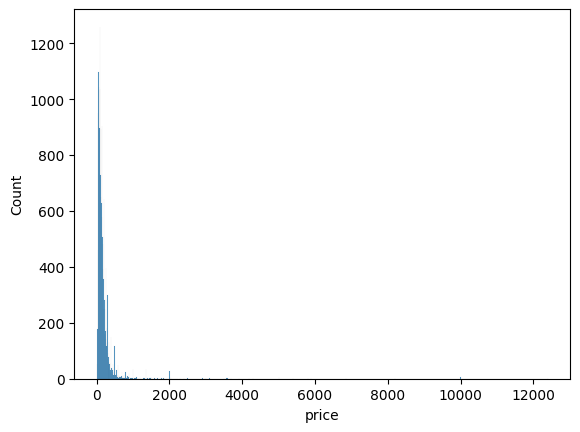

In [503]:
sns.histplot(x = dataT['price'])

In [504]:
filtered = dataT[~np.isnan(dataT['price'])]['price']
perc = np.percentile(filtered, 95)
print('95% wartości price znajduje się w przedziale do: {0:.2f}'.format(perc))
dataT = dataT[dataT['price'] < perc]

95% wartości price znajduje się w przedziale do: 425.00


<Axes: xlabel='price', ylabel='Count'>

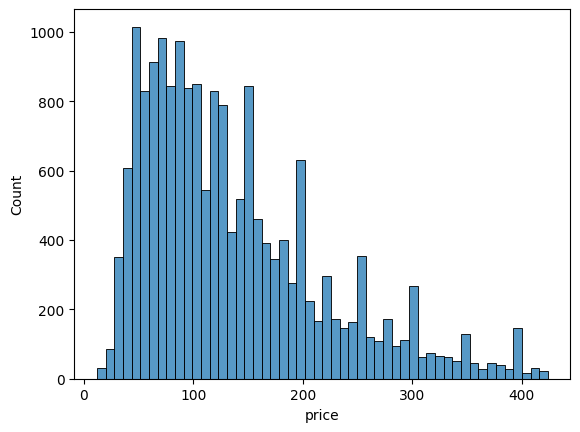

In [505]:
sns.histplot(x = dataT['price'])

In [506]:
dataT.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1002736951366032648,https://www.airbnb.com/rooms/1002736951366032648,20231212054246,2023-12-12,city scrape,Bungalow in Toronto · ★New · 1 bedroom · 1 bed...,NaN,https://a0.muscache.com/pictures/8c0a277f-2ce5...,273730029,https://www.airbnb.com/users/show/273730029,Tran Thien Ly,2019-07-05,"Toronto, Canada","""The most beautiful things in life are not thi...",within an hour,1.00,0.98,False,https://a0.muscache.com/im/pictures/user/fe5d9...,https://a0.muscache.com/im/pictures/user/fe5d9...,5.00,6.00,"['email', 'phone']",True,True,NaN,Humber Heights-Westmount,43.69,-79.52,Private room in bungalow,Private room,2,1.00,1 bath,1.00,72.00,28,365,28,28,365,365,28.00,365.00,True,21,51,81,94,2023-12-12,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,3,0,3,0,NaN
1,716133555965651038,https://www.airbnb.com/rooms/716133555965651038,20231212054246,2023-12-12,city scrape,Townhouse in North York · 1 bedroom · 2 beds ·...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,474878080,https://www.airbnb.com/users/show/474878080,Huu-Hoa,2022-08-13,"Toronto, Canada",NaN,within an hour,1.00,0.95,True,https://a0.muscache.com/im/pictures/user/ca5fb...,https://a0.muscache.com/im/pictures/user/ca5fb...,4.00,5.00,"['email', 'phone']",True,True,NaN,Downsview-Roding-CFB,43.74,-79.47,Private room in townhouse,Private room,3,1.00,1 private bath,2.00,110.00,28,365,28,28,1125,1125,28.00,1125.00,True,30,60,90,365,2023-12-12,1,0,0,2022-11-24,2022-11-24,5.00,5.00,5.00,5.00,5.00,5.00,5.00,STR-2208-FWRHHD,True,4,0,4,0,0.08
2,27278791,https://www.airbnb.com/rooms/27278791,20231212054246,2023-12-12,city scrape,Home in Toronto · ★4.91 · 1 bedroom · 2 beds ·...,This house is on a very quiet street of the Ce...,https://a0.muscache.com/pictures/miso/Hosting-...,141166875,https://www.airbnb.com/users/show/141166875,Andrew,2017-07-18,"Toronto, Canada",NaN,within an hour,1.00,0.99,True,https://a0.muscache.com/im/pictures/user/247f8...,https://a0.muscache.com/im/pictures/user/247f8...,3.00,7.00,"['email', 'phone']",True,True,"Toronto, Ontario, Canada",Kingsview Village-The Westway,43.70,-79.54,Private room in home,Private room,4,1.00,1 private bath,2.00,104.00,1,89,1,2,1125,1125,1.50,1125.00,True,18,48,78,334,2023-12-12,503,107,15,2018-10-19,2023-12-11,4.91,4.94,4.92,4.97,4.97,4.90,4.87,STR-2009-GQYXPG,False,3,0,3,0,8.02


In [507]:
dataT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18012 entries, 0 to 19993
Data columns (total 69 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            18012 non-null  int64         
 1   listing_url                                   18012 non-null  object        
 2   scrape_id                                     18012 non-null  int64         
 3   last_scraped                                  18012 non-null  datetime64[ns]
 4   source                                        18012 non-null  object        
 5   name                                          18012 non-null  object        
 6   neighborhood_overview                         10337 non-null  object        
 7   picture_url                                   18012 non-null  object        
 8   host_id                                       18012 non-null  int6

In [508]:
dataT.loc[:, dataT1].select_dtypes(include='number').isna().sum().sort_values(ascending=False) / len(dataT) * 100

reviews_per_month             23.42
review_scores_checkin         23.37
review_scores_rating          23.37
review_scores_accuracy        23.37
review_scores_cleanliness     23.37
review_scores_communication   23.37
review_scores_location        23.37
review_scores_value           23.37
beds                           0.89
host_response_rate             0.00
host_acceptance_rate           0.00
host_listings_count            0.00
host_total_listings_count      0.00
bathrooms                      0.00
price                          0.00
dtype: float64

In [509]:
dataT['reviews_per_month'].describe()

count   13793.00
mean        1.42
std         1.77
min         0.01
25%         0.22
50%         0.66
75%         2.04
max        13.40
Name: reviews_per_month, dtype: float64

In [510]:
# średnia 1.4 a max 13 -> najpewniej są wartości odstające

In [511]:
dataH = dataT[(dataT['reviews_per_month'] < 1.5)]['reviews_per_month']

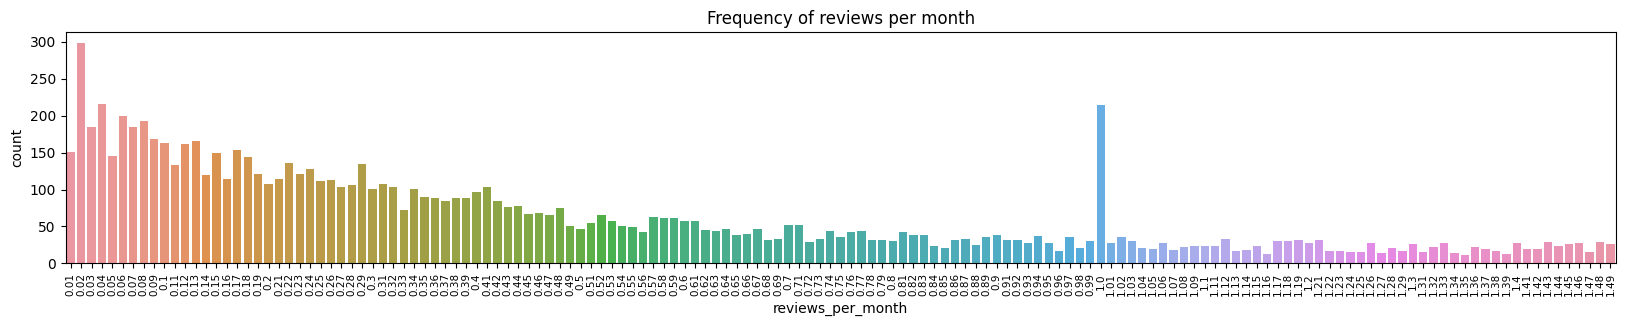

In [512]:
plt.figure(figsize=(20,3))
sns.countplot(x = dataH)
plt.title('Frequency of reviews per month')
plt.xticks(rotation=90, size=7.5)
plt.show()

In [513]:
dataH = dataT[(dataT['reviews_per_month'] < 15) & (dataT['reviews_per_month'] > 9)]['reviews_per_month']

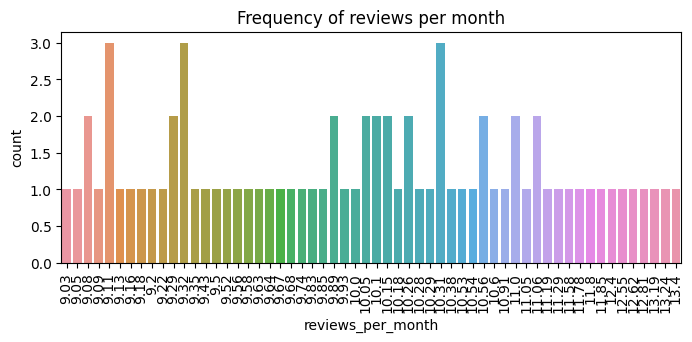

In [514]:
plt.figure(figsize=(8,3))
sns.countplot(x = dataH)
plt.title('Frequency of reviews per month')
plt.xticks(rotation=90)
plt.show()

In [515]:
# Trzeba wyfiltrować wartości NaN by policzyć percentyle - powyżej 95% wyniki można odrzucić
filtered = dataT[~np.isnan(dataT['reviews_per_month'])]['reviews_per_month']
perc = np.percentile(filtered, 95)
print('95% wartości reviews_per_month znajduje się w przedziale do: {0:.2f}'.format(perc))

95% wartości reviews_per_month znajduje się w przedziale do: 5.12


In [516]:
dataT['reviews_per_month'].isna().sum()

4219

In [517]:
filtered.describe()

count   13793.00
mean        1.42
std         1.77
min         0.01
25%         0.22
50%         0.66
75%         2.04
max        13.40
Name: reviews_per_month, dtype: float64

In [518]:
filtered = filtered[filtered < perc]

In [519]:
# można odrzucić takie outliery
dataT = dataT[dataT['reviews_per_month'] < perc]

In [520]:
dataT['reviews_per_month'].describe()

count   13102.00
mean        1.14
std         1.24
min         0.01
25%         0.21
50%         0.59
75%         1.76
max         5.11
Name: reviews_per_month, dtype: float64

In [521]:
dataT.loc[:, dataT1].select_dtypes(include='number').isna().sum().sort_values(ascending=False) / len(dataT) * 100

beds                          0.77
review_scores_checkin         0.01
host_response_rate            0.00
host_acceptance_rate          0.00
host_listings_count           0.00
host_total_listings_count     0.00
bathrooms                     0.00
price                         0.00
review_scores_rating          0.00
review_scores_accuracy        0.00
review_scores_cleanliness     0.00
review_scores_communication   0.00
review_scores_location        0.00
review_scores_value           0.00
reviews_per_month             0.00
dtype: float64

In [522]:
# beds - jeśli nie ma to zakładamy modę
dataT['beds'].unique()

array([ 2., nan,  1.,  3.,  5.,  4.,  6.,  7.,  8., 12.,  9., 10.])

In [523]:
dataT['beds'].mode()

0   1.00
Name: beds, dtype: float64

In [524]:
dataT['beds'].fillna(1, inplace=True)

In [525]:
dataT['beds'].isna().sum()

0

In [526]:
# ostatnia wartość nan
dataT['review_scores_checkin'].describe()

count   13101.00
mean        4.85
std         0.35
min         0.00
25%         4.83
50%         4.96
75%         5.00
max         5.00
Name: review_scores_checkin, dtype: float64

In [527]:
# wypełniamy średnią
dataT['review_scores_checkin'].fillna(dataT['review_scores_checkin'].mean(), inplace=True)

In [528]:
# sprawdzenie czy są jakiekolwiek wartości nan w typach numerycznych
dataT.select_dtypes(include='number').isna().sum().sum()

0

In [529]:
dataT.host_response_time.unique()

array(['within an hour', nan, 'within a few hours', 'within a day',
       'a few days or more'], dtype=object)

In [530]:
dataT.host_response_time.mode()

0    within an hour
Name: host_response_time, dtype: object

In [531]:
dataT['host_response_time'].fillna('within an hour', inplace=True)
dataT['host_response_time'].unique()

array(['within an hour', 'within a few hours', 'within a day',
       'a few days or more'], dtype=object)

In [532]:
dataT.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1,716133555965651038,https://www.airbnb.com/rooms/716133555965651038,20231212054246,2023-12-12,city scrape,Townhouse in North York · 1 bedroom · 2 beds ·...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,474878080,https://www.airbnb.com/users/show/474878080,Huu-Hoa,2022-08-13,"Toronto, Canada",NaN,within an hour,1.00,0.95,True,https://a0.muscache.com/im/pictures/user/ca5fb...,https://a0.muscache.com/im/pictures/user/ca5fb...,4.00,5.00,"['email', 'phone']",True,True,NaN,Downsview-Roding-CFB,43.74,-79.47,Private room in townhouse,Private room,3,1.00,1 private bath,2.00,110.00,28,365,28,28,1125,1125,28.00,1125.00,True,30,60,90,365,2023-12-12,1,0,0,2022-11-24,2022-11-24,5.00,5.00,5.00,5.00,5.00,5.00,5.00,STR-2208-FWRHHD,True,4,0,4,0,0.08
3,53526328,https://www.airbnb.com/rooms/53526328,20231212054246,2023-12-12,city scrape,Home in Toronto · ★4.67 · 1 bedroom · 1 privat...,"Leaside community, one of the best communities...",https://a0.muscache.com/pictures/5739d988-a2d5...,8569918,https://www.airbnb.com/users/show/8569918,Sharon,2013-09-01,"Toronto, Canada",I have been a resident of Toronto for over twe...,within an hour,0.90,0.88,False,https://a0.muscache.com/im/pictures/user/d7e4a...,https://a0.muscache.com/im/pictures/user/d7e4a...,37.00,55.00,"['email', 'phone']",True,True,"Toronto, Ontario, Canada",Leaside-Bennington,43.71,-79.37,Private room in home,Private room,2,1.00,1 private bath,1.00,120.00,28,1125,28,28,1125,1125,28.00,1125.00,True,0,13,43,133,2023-12-12,9,6,0,2022-02-12,2023-11-01,4.67,4.67,4.44,4.78,4.89,4.78,4.44,NaN,True,36,10,26,0,0.40


In [533]:
# kodowanie danych kategorycznych
label_encoder = LabelEncoder()
dataT['room_type_encoded'] = label_encoder.fit_transform(dataT['room_type'])
dataT['host_response_time_encoded'] = label_encoder.fit_transform(dataT['host_response_time'])
dataT['neighbourhood_cleansed_encoded'] = label_encoder.fit_transform(dataT['neighbourhood_cleansed'])
dataT['property_type_encoded'] = label_encoder.fit_transform(dataT['property_type'])

In [534]:
 all_num_feats = [x for x in dataT.dtypes[(dataT.dtypes != 'object') & (dataT.dtypes != 'datetime64[ns]')].index if not ('id' in x) and not ('price' in x)]

In [535]:
dataT[all_num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
host_response_rate,13102.00,0.96,0.13,0.00,0.95,1.00,1.00,1.00
host_acceptance_rate,13102.00,0.87,0.20,0.00,0.85,0.92,1.00,1.00
host_listings_count,13102.00,5.49,18.65,1.00,1.00,2.00,4.00,466.00
host_total_listings_count,13102.00,8.68,27.78,1.00,1.00,3.00,6.00,559.00
latitude,13102.00,43.69,0.05,43.59,43.65,43.67,43.71,43.84
longitude,13102.00,-79.40,0.07,-79.62,-79.43,-79.40,-79.37,-79.13
accommodates,13102.00,3.00,1.80,1.00,2.00,2.00,4.00,16.00
bathrooms,13102.00,1.23,0.50,0.00,1.00,1.00,1.00,7.00
beds,13102.00,1.67,0.99,1.00,1.00,1.00,2.00,12.00
minimum_nights,13102.00,24.37,36.11,1.00,3.00,28.00,28.00,1125.00


## Regresja liniowa

In [537]:
# Sprawdzenie czy wszystkie dane typów innych niż object nie mają wartości NaN
dataT.dtypes[dataT.dtypes != 'object'].isna().sum()

0

In [538]:
dataT.dtypes[(dataT.dtypes != 'object') & (dataT.dtypes != 'datetime64[ns]')]

id                                                int64
scrape_id                                         int64
host_id                                           int64
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
latitude                                        float64
longitude                                       float64
accommodates                                      int64
bathrooms                                       float64
beds                                            float64
price                                           float64
minimum_nights                                    int64
maximum_nights                                  

In [539]:
# get all numeric - just string creation
" + ".join(all_num_feats)

'host_response_rate + host_acceptance_rate + host_is_superhost + host_listings_count + host_total_listings_count + host_has_profile_pic + latitude + longitude + accommodates + bathrooms + beds + minimum_nights + maximum_nights + minimum_minimum_nights + maximum_minimum_nights + minimum_maximum_nights + maximum_maximum_nights + minimum_nights_avg_ntm + maximum_nights_avg_ntm + has_availability + availability_30 + availability_60 + availability_90 + availability_365 + number_of_reviews + number_of_reviews_ltm + number_of_reviews_l30d + review_scores_rating + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_location + review_scores_value + instant_bookable + calculated_host_listings_count + calculated_host_listings_count_entire_homes + calculated_host_listings_count_private_rooms + calculated_host_listings_count_shared_rooms + reviews_per_month + room_type_encoded + host_response_time_encoded + neighbourhood_cleansed_

In [540]:
model = smf.ols(
    '''
    price ~ host_response_rate +
    host_acceptance_rate +
    host_is_superhost +
    host_listings_count +
    host_total_listings_count +
    host_has_profile_pic +
    latitude +
    longitude +
    accommodates +
    bathrooms +
    beds +
    minimum_nights +
    maximum_nights +
    minimum_minimum_nights +
    maximum_minimum_nights +
    minimum_maximum_nights +
    maximum_maximum_nights +
    minimum_nights_avg_ntm +
    maximum_nights_avg_ntm +
    has_availability +
    availability_30 +
    availability_60 +
    availability_90 +
    availability_365 +
    number_of_reviews +
    number_of_reviews_ltm +
    number_of_reviews_l30d +
    review_scores_rating +
    review_scores_accuracy +
    review_scores_cleanliness +
    review_scores_checkin +
    review_scores_communication +
    review_scores_location +
    review_scores_value +
    instant_bookable +
    calculated_host_listings_count +
    calculated_host_listings_count_entire_homes +
    calculated_host_listings_count_private_rooms +
    calculated_host_listings_count_shared_rooms +
    reviews_per_month
    ''', data = dataT).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     276.7
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:58:34   Log-Likelihood:                -72399.
No. Observations:               13102   AIC:                         1.449e+05
Df Residuals:                   13061   BIC:                         1.452e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [541]:
dataT_scaled = dataT.copy()
scaler = StandardScaler()
dataT_scaled[all_num_feats] = scaler.fit_transform(dataT_scaled[all_num_feats])
dataT_scaled[all_num_feats]

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,latitude,longitude,accommodates,bathrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded,host_response_time_encoded,neighbourhood_cleansed_encoded,property_type_encoded
1,0.33,0.43,1.30,-0.08,-0.13,0.15,1.00,-1.05,0.00,-0.47,0.33,0.10,-0.35,0.11,0.04,0.91,0.90,0.08,0.91,0.44,1.49,1.34,1.25,1.66,-0.57,-0.63,-0.44,0.58,0.52,0.62,0.43,0.39,0.58,0.72,2.12,0.05,-0.41,0.55,-0.09,-0.85,1.33,0.47,-1.07,1.90
3,-0.46,0.07,-0.77,1.69,1.67,0.15,0.49,0.37,-0.55,-0.47,-0.68,0.10,1.30,0.11,0.04,0.91,0.90,0.08,0.91,0.44,-1.00,-0.60,-0.03,-0.10,-0.43,-0.16,-0.44,-0.23,-0.33,-0.62,-0.20,0.08,-0.13,-0.55,2.12,5.10,1.68,5.84,-0.09,-0.59,1.33,0.47,-0.19,1.18
7,-0.07,0.69,-0.77,-0.24,-0.28,-6.66,-0.55,-0.11,-0.55,-0.47,-0.68,0.10,-0.35,0.11,0.04,-0.72,-0.74,0.08,-0.73,0.44,1.49,1.34,1.25,1.65,0.42,-0.55,-0.44,-0.04,0.24,-0.18,-0.20,-0.17,0.42,0.06,2.12,-0.43,-0.21,-0.41,-0.09,0.91,-0.74,0.47,1.00,-0.34
9,-0.07,-0.08,-0.77,-0.24,-0.28,0.15,-0.96,0.00,0.00,-0.47,0.33,0.10,1.30,0.11,0.04,0.91,0.90,0.08,0.91,-2.25,-1.00,-1.14,-1.21,-1.11,0.15,-0.63,-0.44,0.09,0.26,0.18,0.29,0.31,0.48,0.47,-0.47,-0.43,-0.21,-0.41,-0.09,-0.51,-0.74,0.47,1.04,-0.34
10,-0.07,-0.08,-0.77,-0.19,-0.06,0.15,-0.67,-0.46,1.11,-0.47,0.33,0.10,1.30,0.11,0.04,0.91,0.90,0.08,0.91,-2.25,-1.00,-1.14,-1.21,-1.11,-0.56,-0.63,-0.44,0.58,0.52,-1.60,0.43,0.39,0.58,-0.41,-0.47,-0.27,-0.21,-0.17,-0.09,-0.90,-0.74,0.47,-0.17,-0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19988,0.33,0.23,1.30,-0.19,-0.24,0.15,0.05,0.99,0.00,-0.47,0.33,-0.65,-0.35,-0.64,-0.65,-0.72,-0.74,-0.66,-0.73,0.44,-1.00,-1.14,-1.21,-1.11,-0.22,0.95,2.44,-0.01,-0.22,0.51,-0.26,0.25,0.42,-0.14,-0.47,-0.27,-0.41,0.07,-0.09,2.56,1.33,0.47,-1.17,1.18
19989,0.33,0.63,1.30,-0.19,-0.24,0.15,1.34,3.00,-0.55,0.54,-0.68,-0.62,-0.35,-0.61,-0.62,0.91,0.90,-0.63,0.91,0.44,-0.91,-0.40,0.10,1.24,2.40,1.26,-0.44,0.01,0.11,0.02,0.23,0.08,-0.68,0.34,-0.47,-0.27,-0.41,0.07,-0.09,0.37,1.33,0.47,-0.74,1.18
19990,0.33,0.63,1.30,-0.24,0.59,0.15,-0.71,-0.00,1.66,-0.47,1.34,-0.62,-0.35,-0.64,-0.62,-0.72,-0.74,-0.64,-0.73,0.44,-1.00,-1.14,-1.21,-1.11,-0.56,-0.47,1.48,0.58,0.52,0.62,0.43,0.39,0.58,0.72,2.12,-0.43,-0.21,-0.41,-0.09,0.69,-0.74,0.47,-0.38,-0.70
19991,0.33,0.63,1.30,-0.19,-0.20,0.15,-0.72,-0.51,-0.55,0.54,-0.68,-0.62,-1.14,-0.64,-0.62,0.91,0.90,-0.63,0.91,0.44,-1.00,-1.14,-1.21,-1.11,4.86,3.32,0.52,0.38,0.34,0.44,0.32,0.34,0.09,0.43,2.12,-0.43,-0.41,-0.17,-0.09,1.77,1.33,0.47,-0.17,1.63


In [542]:
dataT_subset = dataT_scaled.loc[:, all_num_feats + ['price']]

Xt = dataT_subset.loc[:,all_num_feats]
yt = np.array(dataT_subset.price)

X_trainT, X_testT, y_trainT, y_testT = train_test_split(Xt, yt, test_size=0.2)

In [543]:
# model z innej biblioteki - statsmodels.api, w tym przypadku trzeba dodać kolumnę stałych - add_constant
X_trainT = sm.add_constant(X_trainT)
X_testT = sm.add_constant(X_testT)
model = sm.OLS(y_trainT, X_trainT).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     233.6
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:58:34   Log-Likelihood:                -57591.
No. Observations:               10481   AIC:                         1.153e+05
Df Residuals:                   10436   BIC:                         1.156e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [544]:
# usunięcie cech

to_removeT = ['review_scores_accuracy', 'minimum_minimum_nights', 'host_has_profile_pic', 'host_total_listings_count',
              'availability_90', 'availability_365', 'host_is_superhost', 'calculated_host_listings_count', 'minimum_nights_avg_ntm',
              'maximum_minimum_nights', 'host_acceptance_rate', 'host_response_rate', 'maximum_nights', 'review_scores_communication',
              'instant_bookable', 'review_scores_value', 'review_scores_rating', 'calculated_host_listings_count_entire_homes',
              'minimum_maximum_nights', 'host_listings_count', 'host_response_time_encoded']

variablesT = list(filter(lambda x: x not in to_removeT, all_num_feats))

dataT_subset = dataT_scaled.loc[:, variablesT + ['price']]

Xt = dataT_subset.loc[:,variablesT]
yt = np.array(dataT_subset.price)

X_trainT, X_testT, y_trainT, y_testT = train_test_split(Xt, yt, test_size=0.2)

X_trainT = sm.add_constant(X_trainT)
X_testT = sm.add_constant(X_testT)
model = sm.OLS(y_trainT, X_trainT).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     441.1
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:58:34   Log-Likelihood:                -57580.
No. Observations:               10481   AIC:                         1.152e+05
Df Residuals:                   10457   BIC:                         1.154e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [545]:
# Losowanie najlepszych cech

best_featuresT = []
best_r2T = -1

for i in range(100):

    size = np.random.randint(1, len(dataT_subset.columns[:-1]) + 1)

    variables_sub = np.random.choice(dataT_subset.columns[:-1], size=size, replace=False)

    X = dataT_subset.loc[:,variables_sub]
    y = np.array(dataT_subset.price)
    model = sm.OLS(y, sm.add_constant(X)).fit()

    r2 = r2_score(y, model.predict(sm.add_constant(X)))

    if r2 > best_r2:
        best_r2T = r2
        best_featuresT = variables_sub
        best_sizeT = size

print("Najlepszy rozmiar:", best_sizeT)
print("Najlepsze cechy:", best_featuresT)
print("Najwyższy wynik R-squared:", best_r2T)

Najlepszy rozmiar: 20
Najlepsze cechy: ['maximum_maximum_nights' 'neighbourhood_cleansed_encoded'
 'room_type_encoded' 'number_of_reviews_ltm' 'bathrooms'
 'review_scores_location' 'property_type_encoded' 'longitude'
 'calculated_host_listings_count_shared_rooms' 'review_scores_cleanliness'
 'maximum_nights_avg_ntm' 'latitude' 'number_of_reviews_l30d'
 'availability_30' 'accommodates' 'availability_60' 'number_of_reviews'
 'has_availability' 'minimum_nights' 'review_scores_checkin']
Najwyższy wynik R-squared: 0.4889535140057363


In [546]:
best_featuresT = list(best_featuresT)

In [547]:
dataT_subset_ed = dataT_scaled.loc[:, best_featuresT + ['price']]

Xg = dataT_subset_ed.loc[:,best_featuresT]
yg = np.array(dataT_subset_ed.price)

X_trainT, X_testT, y_trainT, y_testT = train_test_split(Xg, yg, test_size=0.2)

X_trainT = sm.add_constant(X_trainT)
X_testT = sm.add_constant(X_testT)
model = sm.OLS(y_trainT, X_trainT).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     505.1
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:58:37   Log-Likelihood:                -57542.
No. Observations:               10481   AIC:                         1.151e+05
Df Residuals:                   10460   BIC:                         1.153e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

### Prediction

In [548]:
# predykcja na zbiorze testowym
y_predT = model.predict(X_testT)

In [549]:
X_testT.reset_index(drop=True, inplace=True)

In [550]:
dataT_model_preds = pd.concat([X_testT, pd.Series(y_testT).rename('price'), model.predict(X_testT).rename('predict')], axis = 1)

In [551]:
dataT_model_preds.tail(3)

,const,maximum_maximum_nights,neighbourhood_cleansed_encoded,room_type_encoded,number_of_reviews_ltm,bathrooms,review_scores_location,property_type_encoded,longitude,calculated_host_listings_count_shared_rooms,review_scores_cleanliness,maximum_nights_avg_ntm,latitude,number_of_reviews_l30d,availability_30,accommodates,availability_60,number_of_reviews,has_availability,minimum_nights,review_scores_checkin,price,predict
2618,1.00,0.90,-0.76,-0.74,1.66,1.55,-0.03,-0.70,1.08,-0.09,0.44,0.91,-0.22,-0.44,0.58,1.11,0.39,1.85,0.44,-0.59,0.37,314.00,230.73
2619,1.00,0.90,-0.19,-0.74,-0.31,-0.47,0.03,-0.34,0.51,-0.09,0.44,0.91,0.59,0.52,-0.75,-1.11,-0.93,-0.37,0.44,0.10,0.20,60.00,97.32
2620,1.00,-1.48,0.12,-0.74,-0.16,-0.47,0.58,-0.88,0.09,-0.09,0.62,-1.47,0.39,3.40,-0.08,-0.55,0.43,-0.48,0.44,-0.62,0.43,150.00,119.02


### RMSE

In [552]:
# na zbiorze treningowym
np.sqrt(model.mse_resid)

58.6847717109925

In [553]:
# na zbiorze testowym
mse = mean_squared_error(y_testT, y_predT)
rmse = sqrt(mse)
rmse

60.70416065897877

### Residuals

In [554]:
# na zbiorze testowym
dataT_model_preds['residuals'] = dataT_model_preds['price'] - dataT_model_preds['predict']
dataT_model_preds.head(3)

,const,maximum_maximum_nights,neighbourhood_cleansed_encoded,room_type_encoded,number_of_reviews_ltm,bathrooms,review_scores_location,property_type_encoded,longitude,calculated_host_listings_count_shared_rooms,review_scores_cleanliness,maximum_nights_avg_ntm,latitude,number_of_reviews_l30d,availability_30,accommodates,availability_60,number_of_reviews,has_availability,minimum_nights,review_scores_checkin,price,predict,residuals
0,1.00,0.90,-1.59,-0.74,-0.63,-0.47,-0.13,-1.06,1.97,-0.09,-0.35,0.91,1.70,-0.44,-1.00,0.00,-1.14,-0.43,-2.25,0.10,0.11,89.00,107.97,-18.97
1,1.00,0.90,0.33,-0.74,-0.63,-0.47,-0.23,-0.34,-0.57,-0.09,0.07,0.91,0.07,-0.44,-0.91,0.00,-1.10,0.22,0.44,0.10,0.37,80.00,125.04,-45.04
2,1.00,-1.33,0.90,-0.74,1.11,-0.47,0.16,-0.34,1.29,-0.09,-0.53,-1.32,-0.35,-0.44,-1.00,1.11,-1.14,-0.19,0.44,0.10,-0.95,228.00,201.19,26.81


In [555]:
px.histogram(dataT_model_preds['residuals'])

Text(0, 0.5, 'Residuals')

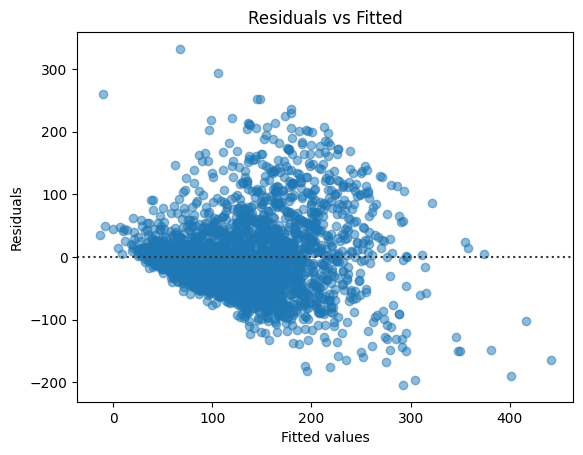

In [556]:
#  Residual plot
plot = sns.residplot(x=dataT_model_preds['predict'], y=dataT_model_preds['residuals'], data=dataT_model_preds,
                     scatter_kws={'alpha': 0.5})
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals')

## Lasso

(0.0014354928661123628,
 77.29190898120989,
 -51.53185461096187,
 50.19426082796148)

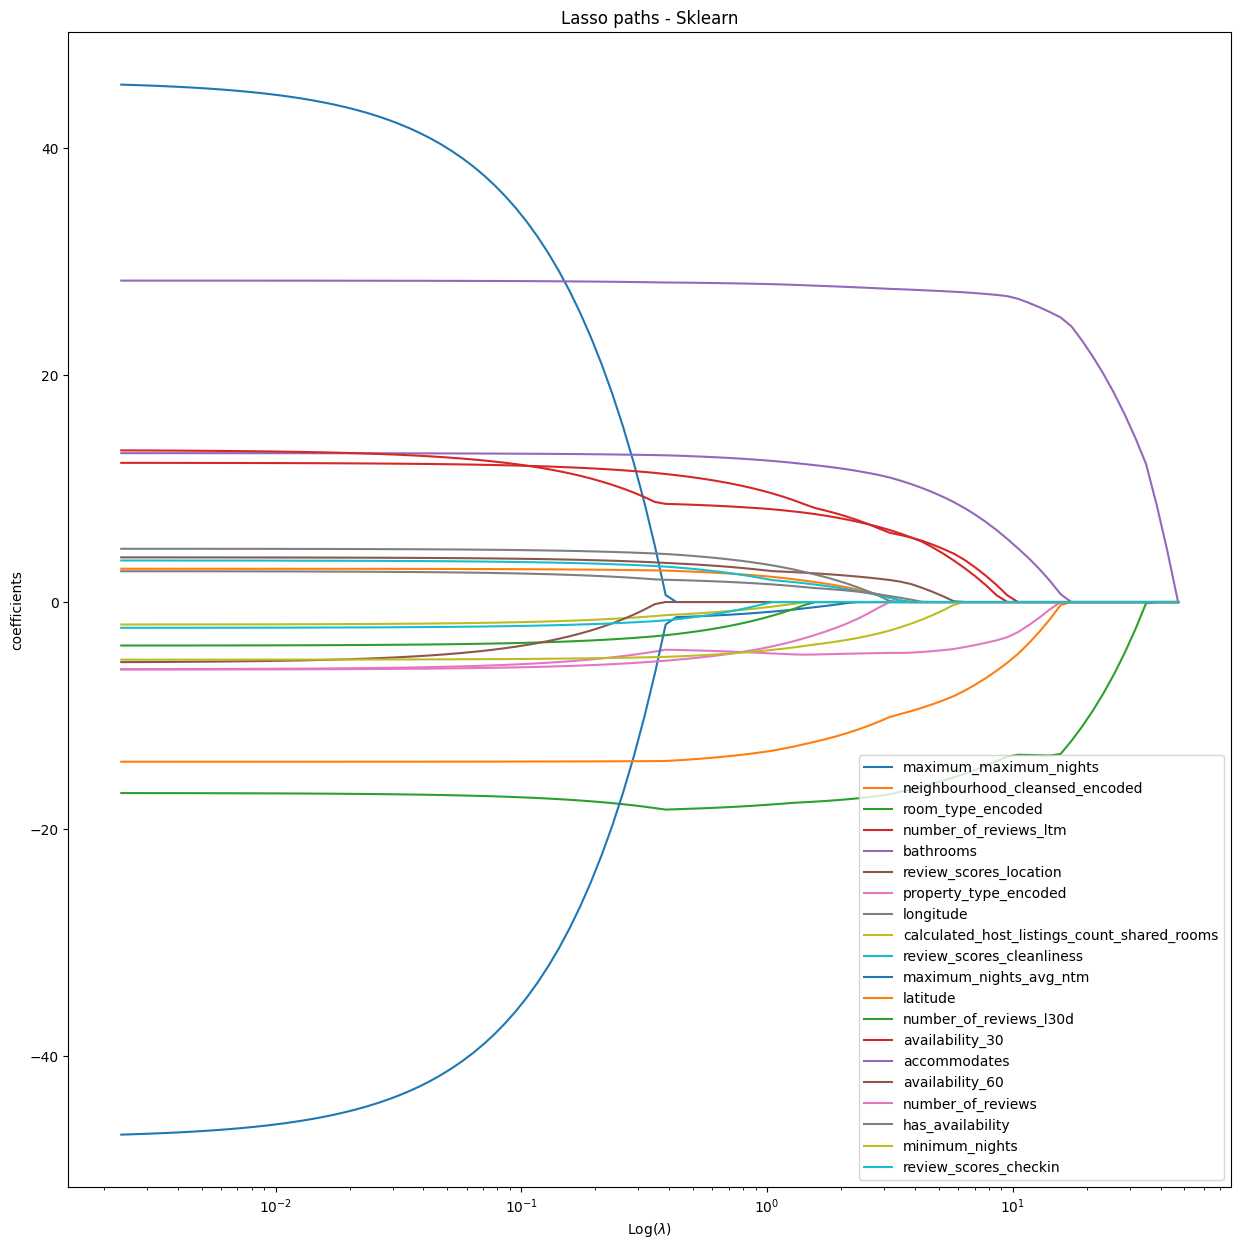

In [559]:
# Lasso

X = dataT_subset.loc[:,best_featuresT]
y = np.array(dataT_subset.price)

alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps = 5e-5)

# Display results
plt.figure(figsize = (15,15))

for i in range(X.shape[1]):
    plt.plot(alphas_lasso, coefs_lasso[i], label = best_featuresT[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')

## XGBoost

In [560]:
for i in range(100):

    size = np.random.randint(1, 20)

    variables_sub = np.random.choice(dataT_subset.columns[:-1], size=size, replace=False)

    X = dataT_subset.loc[:, variables_sub]
    y = np.array(dataT_subset['price'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = xgboost.XGBRegressor(objective ='reg:squarederror')
    model.fit(X_train, y_train)

    # Oblicz r2 na zbiorze testowym
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    if r2 > best_r2:
        best_r2TX = r2
        best_featuresTX = variables_sub
        best_sizeTX = size

print("Najlepsza ilość cech:", best_sizeTX)
print("Najlepsze cechy:", best_featuresTX)
print("Najwyższy wynik R-squared:", best_r2TX)

Najlepsza ilość cech: 5
Najlepsze cechy: ['neighbourhood_cleansed_encoded' 'number_of_reviews_l30d'
 'room_type_encoded' 'minimum_nights' 'availability_30']
Najwyższy wynik R-squared: 0.3689756310317127


In [561]:
best_featuresTX = list(best_featuresTX)

In [563]:
dataT_subset = dataT.loc[:, best_featuresTX + ['price']]

X = dataT_subset.loc[:, best_featuresTX]
y = np.array(dataT['price'])

X_trainTX, X_testTX, y_trainTX, y_testTX = train_test_split(X, y, test_size=0.2, random_state=42)

In [564]:
model = xgboost.XGBRegressor(n_estimators=200, verbosity=1)
model.fit(X_trainTX, y_trainTX)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [565]:
predictedTX = model.predict(X_testTX)
list(zip(y_testTX[0:10], predictedTX[0:10]))

[(110.0, 174.74522),
 (185.0, 191.57306),
 (40.0, 41.83394),
 (34.0, 50.69269),
 (140.0, 168.50854),
 (225.0, 252.97679),
 (299.0, 149.74211),
 (61.0, 48.94087),
 (88.0, 92.198425),
 (100.0, 168.93413)]

In [566]:
px.histogram(y_testTX - predictedTX)

In [567]:
# rmse
np.sqrt(mean_squared_error(y_testTX, predictedTX))

66.06894591750569

In [568]:
# explained variance
explained_variance_score(y_testTX, predictedTX)

0.34529384632058335

In [569]:
# r2
r2_score(y_testTX, predictedTX)

0.3446301847452936

## XAI - Shapley values

In [576]:
#Playing with Shapley values
explainerT = shap.TreeExplainer(model)
shap_valuesT = explainerT.shap_values(X_testTX)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[11:04:26] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.



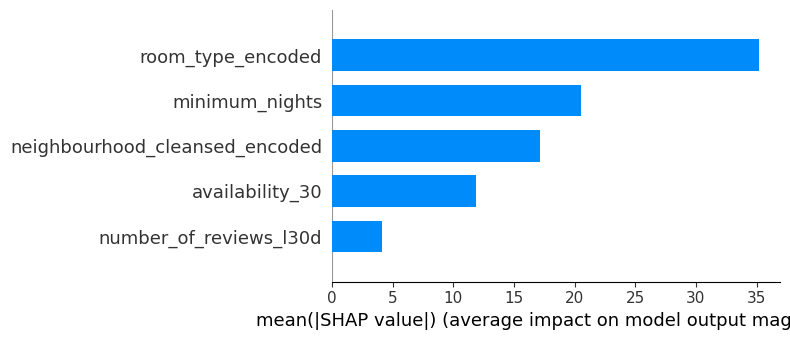

In [577]:
shap.summary_plot(shap_valuesT, X_testTX, plot_type="bar")

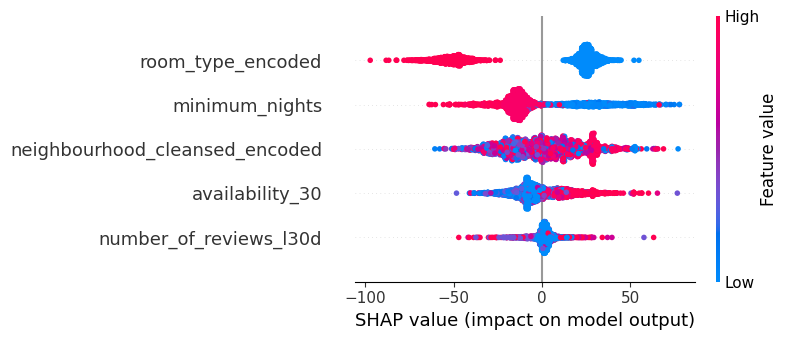

In [579]:
#From official documentation:
'''The summary plot combines feature importance with feature effects.
Each point on the summary plot is a Shapley value for a feature and an instance.
The position on the y-axis is determined by the feature and on the x-axis by the Shapley value.
The color represents the value of the feature from low to high.
Overlapping points are jittered in y-axis direction, so we get a sense of the distribution
of the Shapley values per feature. The features are ordered according to their importance.'''
# So from this plot we can read that guests_included and bedrooms are the most important variables
#    and high number of guests_included/bedrooms is linked to higher price
shap.summary_plot(shap_valuesT, features=X_testTX, feature_names=X_testTX.columns)

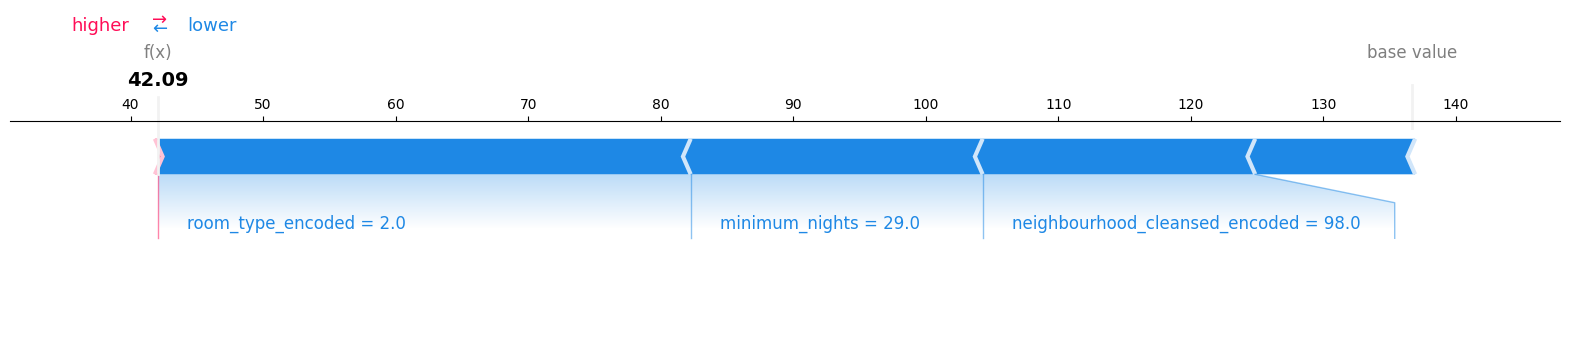

In [580]:
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])
shap.force_plot(explainerT.expected_value, shap_valuesT[50,:], np.round(X_testTX.iloc[50,:],2), matplotlib=True)

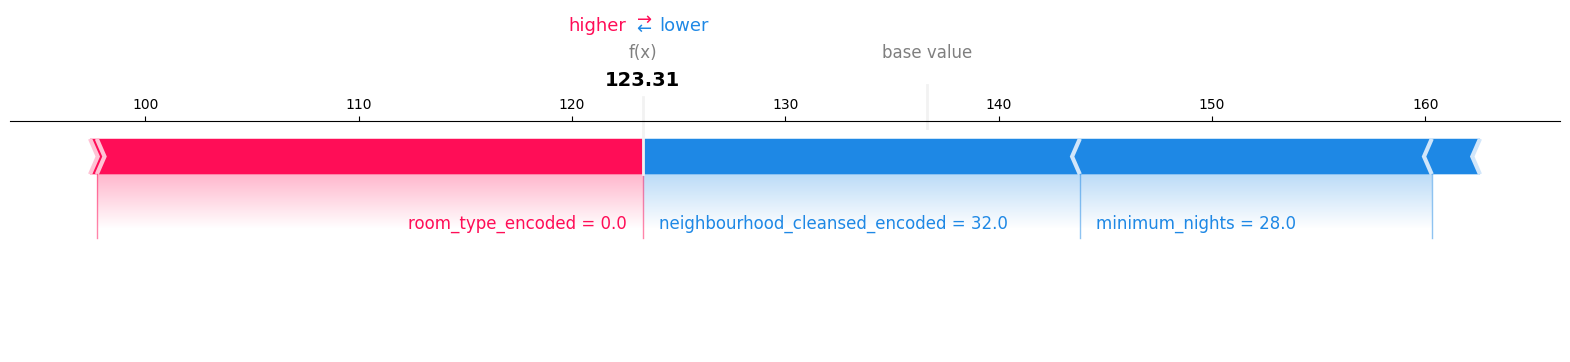

In [581]:
shap.force_plot(explainerT.expected_value, shap_valuesT[610,:], np.round(X_testTX.iloc[610,:],2), matplotlib=True)

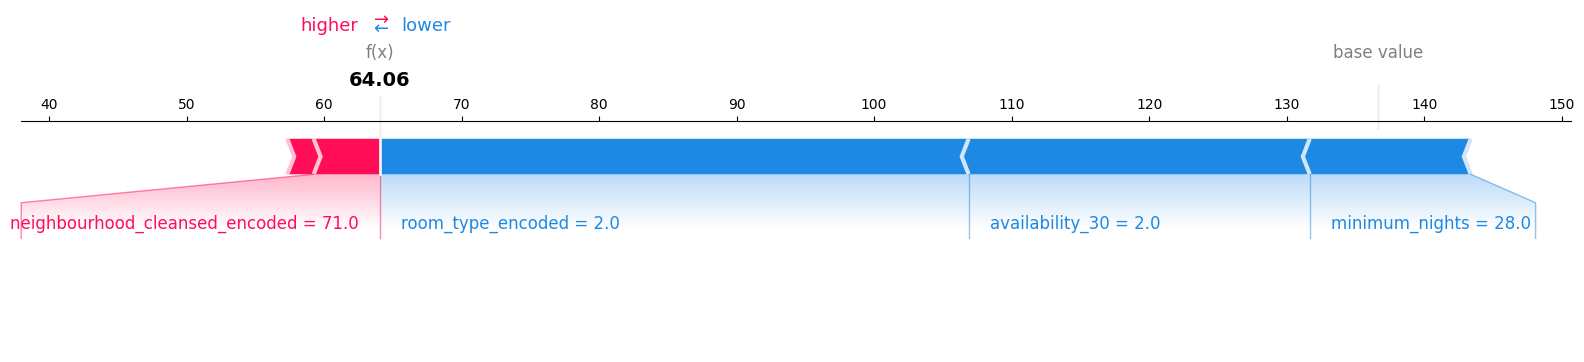

In [582]:
shap.force_plot(explainerT.expected_value, shap_valuesT[605,:], np.round(X_testTX.iloc[605,:],2), matplotlib=True)